# AIML Assignment 2: Time Series (Part A)
- Name: Ashley Bai
- Admin No.: P2237871
- Class: DAAA/FT/2A/04

# Background & Aim
- A <b>time series</b> is defined as a series of data points recorded at different time intervals. A time series may be hourly, daily, weekly, monthly, quarterly, and annual.
- <b>Time series forecasting</b> is a statistical method to analyse the past data within a given duration of time to forecast the future.
- In this analysis, I will be using the given CSV Energy Consumption Dataset to build and train time series models to <b>forecast the gas consumption, electricity consumption and water consumption in the future.</b>

# Table of Contents
1. Background/Introduction
2. Exploratory Data Analysis (EDA)
3. Data Pre-Processing
4. Analyzing Time Series Data with Statsmodels
    - Summarizing Time Series Data (Data Visualization)
    - Checking Time Series Stationarity (Augmented Dickey-Fuller (ADF) test)
    - Making the Time Series Stationary by Differencing
5. Performing Time Series Forecasting
    - Build Baseline Model: Simple Moving Average Model
    - Build Exponential Smoothing Models
    - Build ARIMA Forecast Model
    - Build Seasonal ARIMA (SARIMA) Model
6. Evaluate and Improve the Models
    - Performance metrics such as MAE, RMSE, MAPE
    - Tune hyperparameters, adjust model components, and incorporate additional features or external variables that may influence the time series.
7. Forecast Future Values
    - Use the selected and optimized forecasting model to predict future values of the time series.
    - Plot the forecasted values alongside the historical data to visualize the accuracy and performance of the forecast.
8. Conclusion/Final Insights Gained

<h1><center>Exploratory Data Analysis (EDA)</center></h1>

- Let us first perform basic EDA on the raw Energy Consumption Dataset to find out more about the dataset, and gain a better understanding of it.

<h3>Import libraries/modules</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
import warnings
warnings.filterwarnings("ignore")

<h3>Load the Energy Consumption Dataset</h3>

In [3]:
# load dataset
df = pd.read_csv("C:\YEAR 2 SEM 1\DAAAAIML\DAAAAIML_CA2\ST1511-CA2-dataset\Energy Consumption Dataset.csv")

<h3>General overview of dataset</h3>

In [4]:
# display first 5 rows of dataset
df.head(5)

DATE  Gas Consumption (tons)  Electricity Consumption (MWh)  \
0  1/1/1990                    18.0                          725.1   
1  1/2/1990                    15.8                          706.7   
2  1/3/1990                    17.3                          624.5   
3  1/4/1990                    18.9                          574.7   
4  1/5/1990                    22.0                          553.2   

   Water Consumption (tons)  
0                     548.8  
1                     640.7  
2                     511.1  
3                     515.3  
4                     488.4

In [5]:
# display last 5 rows of dataset
df.tail(5)

DATE  Gas Consumption (tons)  Electricity Consumption (MWh)  \
392   1/9/2022                    27.7                          986.2   
393  1/10/2022                    31.8                          936.1   
394  1/11/2022                    31.0                          973.4   
395  1/12/2022                    32.4                         1147.2   
396   1/1/2023                    31.3                         1294.0   

     Water Consumption (tons)  
392                     513.3  
393                     373.1  
394                     343.9  
395                     348.3  
396                     260.2

- From the above, it is evident that: 
    - The dataset contains numerical variables of float data types, as well as a DATE variable. 
    - The DATE column is not the index of the dataset.
    - The DATE column is of day/month/year format.
    - The data seems to be arranged in chronological order. 

<h3>Inspecting the DATE column</h3>

<h4>Format of the DATE column</h4>

In [6]:
# import datetime module
from datetime import datetime

def check_date_format(date_series):
    for date_str in date_series:
        try:
            # parsing the date string with different format codes
            datetime.strptime(date_str, '%Y-%m-%d')
            print("Date format: 'YYYY-MM-DD'")
        except ValueError:
            try:
                datetime.strptime(date_str, '%d/%m/%Y')
                print("Date format: 'DD/MM/YYYY'")
            except ValueError:
                print(f"Unknown date format: {date_str}")

date_column = df['DATE'].head(5)

# check the format of each date in the DATE column
check_date_format(date_column)

Date format: 'DD/MM/YYYY'
Date format: 'DD/MM/YYYY'
Date format: 'DD/MM/YYYY'
Date format: 'DD/MM/YYYY'
Date format: 'DD/MM/YYYY'


<h4>Date range of the DATE column</h4>

In [7]:
print(f"Date range of Energy Consumption dataset is available from:\nStarting date: {df.loc[:, 'DATE'][0]}\nEnding date: {df.loc[:, 'DATE'][len(df)-1]}")

Date range of Energy Consumption dataset is available from:
Starting date: 1/1/1990
Ending date: 1/1/2023


<h3>Check the shape of df</h3>

In [8]:
# number of rows and columns in df
df.shape

(397, 4)

- There are 397 rows and 4 columns in the original Energy Consumption dataset. 

<h3>Check the data types of df (Existence of null/categorical values)</h3>

In [9]:
# display data types and number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DATE                           397 non-null    object 
 1   Gas Consumption (tons)         397 non-null    float64
 2   Electricity Consumption (MWh)  397 non-null    float64
 3   Water Consumption (tons)       397 non-null    float64
dtypes: float64(3), object(1)
memory usage: 12.5+ KB


- Data Types of variables: 
    - Numerical variables: Gas Consumption (tons), Electricity Consumption (MWh), Water Consumption (tons).
    - Categorical variables: DATE - Need to convert the DATE column to datetime data type.
- Existence of Null Values: 
    - There are no null values in the dataframe. 

<h3>Check for duplicates in df</h3>

In [10]:
# check for duplicated values/rows
print('Are there duplicated values/rows in df:\n', df.duplicated())
print('\n')

# count the number of duplicated rows
duplicated_rows = df.duplicated().sum()

# display the number of duplicated rows
print('Number of duplicated rows: ', duplicated_rows)

Are there duplicated values/rows in df:
 0      False
1      False
2      False
3      False
4      False
       ...  
392    False
393    False
394    False
395    False
396    False
Length: 397, dtype: bool


Number of duplicated rows:  0


- There are no duplicated rows in the Energy Consumption dataframe, minimizing data redundancy. 

<h3>Check for missing values in df</h3>

In [11]:
# check for missing values
# returns True if there are missing/null values
print(df.isnull().values.any(), "\n")

# check for number of null values for entire dataframe
print(df.isnull().sum().sum(), "\n")

# check for number of null values in each column
print(df.isnull().sum(), "\n")

False 

0 

DATE                             0
Gas Consumption (tons)           0
Electricity Consumption (MWh)    0
Water Consumption (tons)         0
dtype: int64 



- There are no missing values in the Energy Consumption dataframe. 

<h3>Check for outliers in df (numerical columns)</h3>

<AxesSubplot:ylabel='Water Consumption (tons)'>

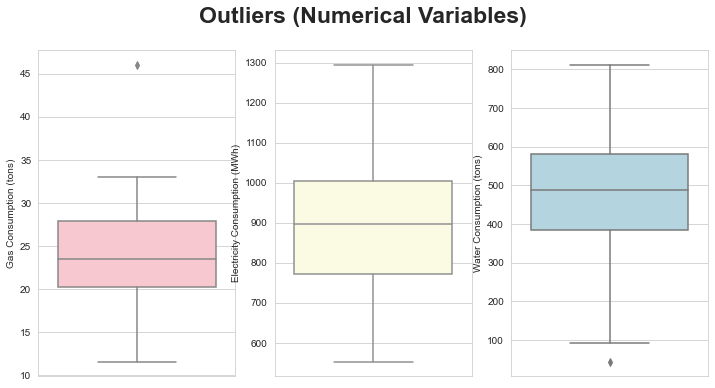

In [12]:
# check for outliers by plotting box plots 
# set grid
sns.set_style('whitegrid')

# plot box plot to check for outliers 
# create figure & axis
fig, ax = plt.subplots(1,3, figsize=(12,6))
# set title for overall figure
fig.suptitle('Outliers (Numerical Variables)', weight="bold", fontsize=23)

# plot boxplots 
plt.subplot(131)
sns.boxplot(y=df['Gas Consumption (tons)'], color='pink')
plt.subplot(132)
sns.boxplot(y=df['Electricity Consumption (MWh)'], color='lightyellow')
plt.subplot(133)
sns.boxplot(y=df['Water Consumption (tons)'], color='lightblue')

- There are presence of outliers in the columns Gas Consumption (tons) and Water Consumption (tons).

<h3>Summary statistics of numerical features in df</h3>

In [13]:
# display summary statistics of numerical features
df.describe().round()

Gas Consumption (tons)  Electricity Consumption (MWh)  \
count                   397.0                          397.0   
mean                     24.0                          888.0   
std                       5.0                          154.0   
min                      12.0                          553.0   
25%                      20.0                          771.0   
50%                      24.0                          898.0   
75%                      28.0                         1005.0   
max                      46.0                         1294.0   

       Water Consumption (tons)  
count                     397.0  
mean                      485.0  
std                       134.0  
min                        44.0  
25%                       384.0  
50%                       487.0  
75%                       580.0  
max                       811.0

- <b>Count:</b>
    - The count is 397, indicating that there are 397 valid data points for Gas Consumption, Electricity Consumption, and Water Consumption.
- <b>Mean:</b>
    - On average, 24 tons of gas, 888 MWh of electricity, and 485 tons of water is consumed. 
- <b>Standard Deviation:</b>
    - The std of Gas Consumption is small (5.0 tons), indicating that the Gas Consumption values are relatively close to the mean, suggesting relatively stable usage. 
    - On the other hand, the std of Electricity Consumption and Water Consumption is large (154.0 MWh and 134.0 tons respectively), indicating higher variability in energy usage.
- <b>Median:</b>
    - The 50th percentile (median) of Gas Consumption and Water Consumption do not differ much from the mean, suggesting normal distributions. 
    - Whereas the 50th percentile (median) of Electricity Consumption differ most from the mean, suggesting a likely possibility of skewness in data distribution. 

<h1><center>Data Pre-Processing</center></h1> 

<h3>Handling categorical variables</h3>

- Need to convert the DATE column of categorical data type to datetime data type. 
- Set the DATE column as the index of the dataframe to facilitate time-based operations <b>(Creating Time Series Index in Pandas)</b>. 

In [14]:
# before 
df.head(5)

DATE  Gas Consumption (tons)  Electricity Consumption (MWh)  \
0  1/1/1990                    18.0                          725.1   
1  1/2/1990                    15.8                          706.7   
2  1/3/1990                    17.3                          624.5   
3  1/4/1990                    18.9                          574.7   
4  1/5/1990                    22.0                          553.2   

   Water Consumption (tons)  
0                     548.8  
1                     640.7  
2                     511.1  
3                     515.3  
4                     488.4

In [15]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%d/%m/%Y')
df.set_index('DATE', inplace=True)

# display dataframe
df.head(5)

Gas Consumption (tons)  Electricity Consumption (MWh)  \
DATE                                                                
1990-01-01                    18.0                          725.1   
1990-02-01                    15.8                          706.7   
1990-03-01                    17.3                          624.5   
1990-04-01                    18.9                          574.7   
1990-05-01                    22.0                          553.2   

            Water Consumption (tons)  
DATE                                  
1990-01-01                     548.8  
1990-02-01                     640.7  
1990-03-01                     511.1  
1990-04-01                     515.3  
1990-05-01                     488.4

<h3>Check to see if columns are now all numerical</h3>

In [16]:
df.index.dtype

dtype('<M8[ns]')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1990-01-01 to 2023-01-01
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gas Consumption (tons)         397 non-null    float64
 1   Electricity Consumption (MWh)  397 non-null    float64
 2   Water Consumption (tons)       397 non-null    float64
dtypes: float64(3)
memory usage: 12.4 KB


- All the variables in the Energy Consumption dataframe are now non-categorical and suitable for time series forecasting. 
- The DATE column is now the index and of datetime64 data type. 

<h1><center>Analyzing Time Series Data with Pandas and Statsmodels</center></h1>

<h3>Split the df into respective Energy Consumption categories for convenience</h3>

In [18]:
# create separate df for gas, electricity and water consumption 
gas = df['Gas Consumption (tons)']
electricity = df['Electricity Consumption (MWh)']
water = df['Water Consumption (tons)']

<h3>Visualization of Time Series Data</h3>

In [19]:
# import necessary libraries and modules 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<h4>Overall time series</h4>

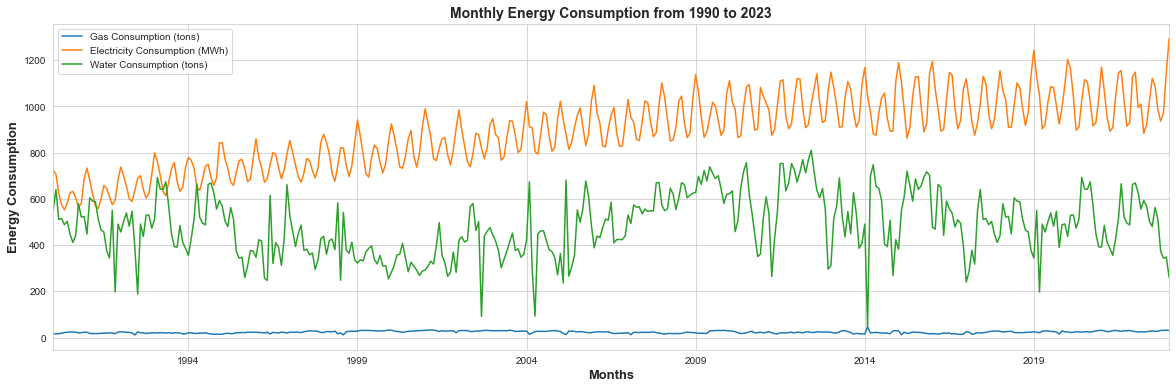

In [20]:
df.plot(figsize=(20,6))
plt.xlabel('Months', fontsize=13, fontweight='bold')
plt.ylabel('Energy Consumption', fontsize=13, fontweight='bold')
plt.title('Monthly Energy Consumption from 1990 to 2023', fontsize=14, fontweight='bold')
plt.show()

- From the general plot of the Energy Consumption dataframe, it is obvious that Electricity Consumption time series follows a strong upward trend. 
- Due to the difference in scales of the data, we are unable to properly see the time series of Gas Consumption. Hence, let us visualize each time series individually. 

<h4>Visualization of <b>Gas</b> Consumption time series</h4>

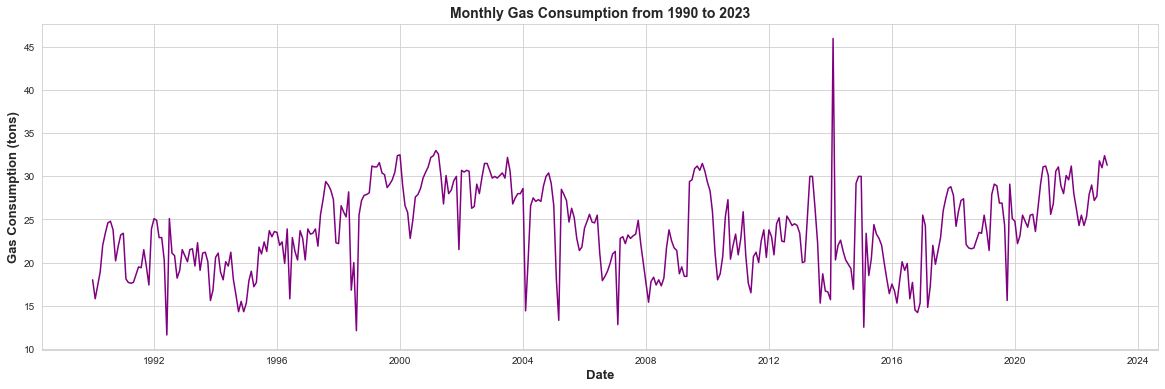

In [21]:
# line Plot
plt.figure(figsize=(20,6))
plt.plot(gas.index, gas, color='purple')
plt.title('Monthly Gas Consumption from 1990 to 2023', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Gas Consumption (tons)', fontsize=13, fontweight='bold')
plt.show()

- <b>Trend</b>: 
    - From the plot, it is evident that the time series has no clear upward or downward trend, as data is seen to be consistently fluctuating from 1990 to 2023. 
- <b>Seasonality</b>: 
    - Generally, seasonality is not clearly observed.
    - There is no distinct consistent seasonal pattern in the data, as there are no repeating patterns of similar magnitude at regular intervals. 
    - However, the graph seems to also show some form of seasonality patterns.
- <b>Outlier</b>: 
    - There could be an outlier in 2014, as a significant peak in Gas Consumption is seen of highest of more than 45 tons. 
- <b>Variability</b>: 
    - The Gas Consumption values vary over time, but causes are uncertain/random variation.

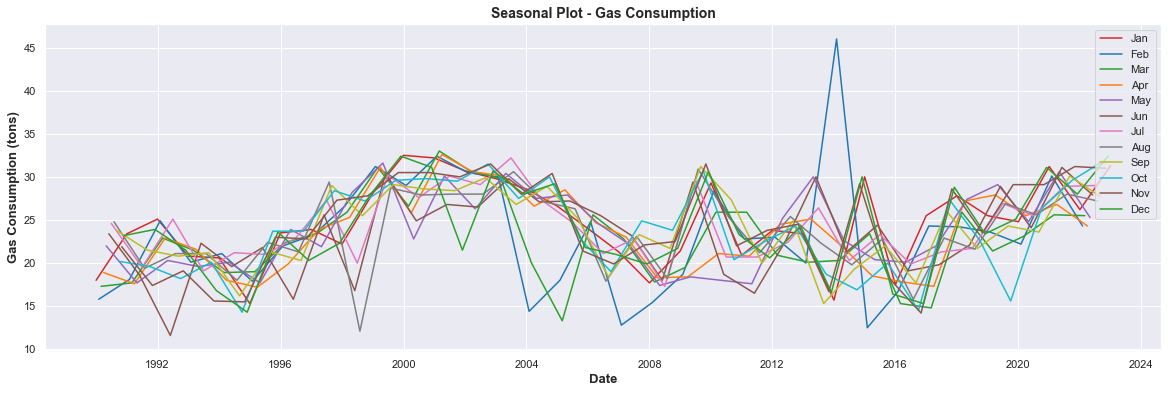

In [22]:
# manually create a list of distinct colors for each month
custom_palette = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown',
                  'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:brown', 'tab:green']

# create the seasonal plot with the custom palette
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,6)})
sns.lineplot(data=gas, x=gas.index, y=gas, hue=gas.index.month, palette=custom_palette)
plt.title('Seasonal Plot - Gas Consumption', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Gas Consumption (tons)', fontsize=13, fontweight='bold')
plt.legend(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], loc='upper right')
plt.show()

- From the seasonal plot, there is no clear distinct seasonal pattern observed for Gas Consumption time series, we need to do further visualizations below to find out. 
- There is a possibility of seasonality. 
- Only in the year of 2014, in the month of february, there is a sudden peak in gas consumption.

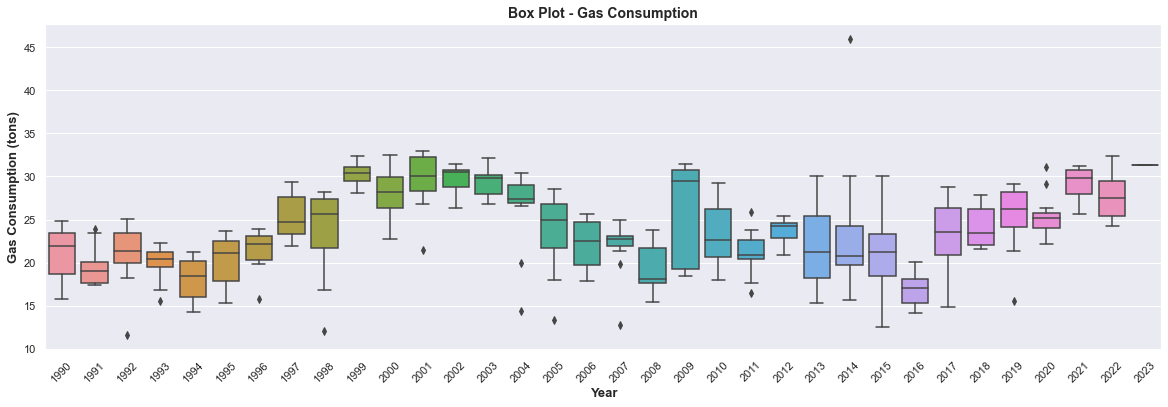

In [23]:
# box plot
plt.figure(figsize=(20,6))
sns.boxplot(x=gas.index.year, y=gas, data=gas)
plt.title('Box Plot - Gas Consumption', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=13, fontweight='bold')
plt.ylabel('Gas Consumption (tons)', fontsize=13, fontweight='bold')
# rotate x-axis tick labels
plt.xticks(rotation=45)
plt.show()

- The medians depicted by the central lines within each boxplot tells us the typical gas consumption for each year.
- We can observe variations in consumption from 1990 to 2023, as evident in the differing heights of the boxplots.
- The wider boxes indicate increased variability in consumption, suggesting fluctuations in gas consumption.
- There are a few outliers for various years, potentially indicating unique events or circumstances. 

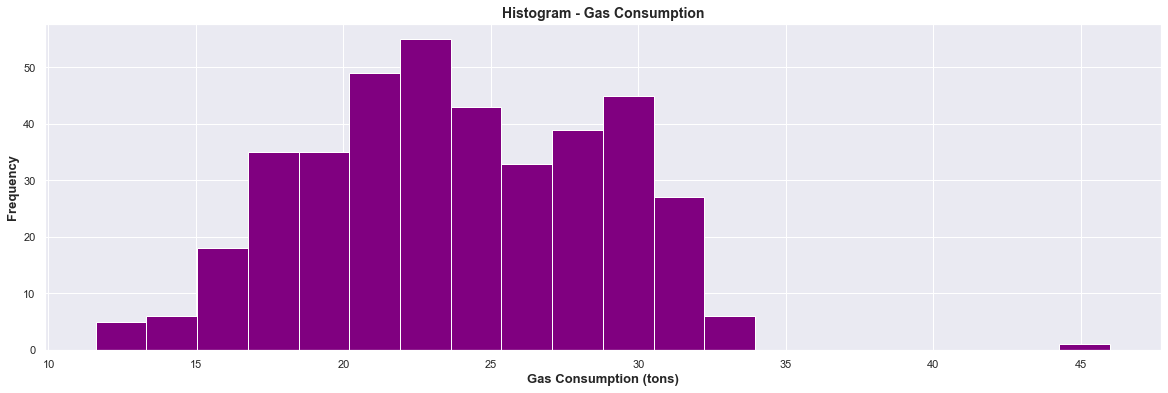

In [24]:
# histogram
plt.figure(figsize=(20,6))
plt.hist(gas, bins=20, color='purple')
plt.title('Histogram - Gas Consumption', fontsize=14, fontweight='bold')
plt.xlabel('Gas Consumption (tons)', fontsize=13, fontweight='bold')
plt.ylabel('Frequency', fontsize=13, fontweight='bold')
plt.show()

- The histogram for Gas Consumption shows a right-skewed distribution (positively-skewed), with majority of values clustered towards the lower end of consumption.
- This indicates that most instances observe relatively lower gas consumption levels, with only a few instances of higher gas consumption.
- There is an outlier bin of 45 tons. 
- The minority instance of higher gas consumption levels could be due to specific events or circumstances. 
- Mean > median.
- There is higher variability. 

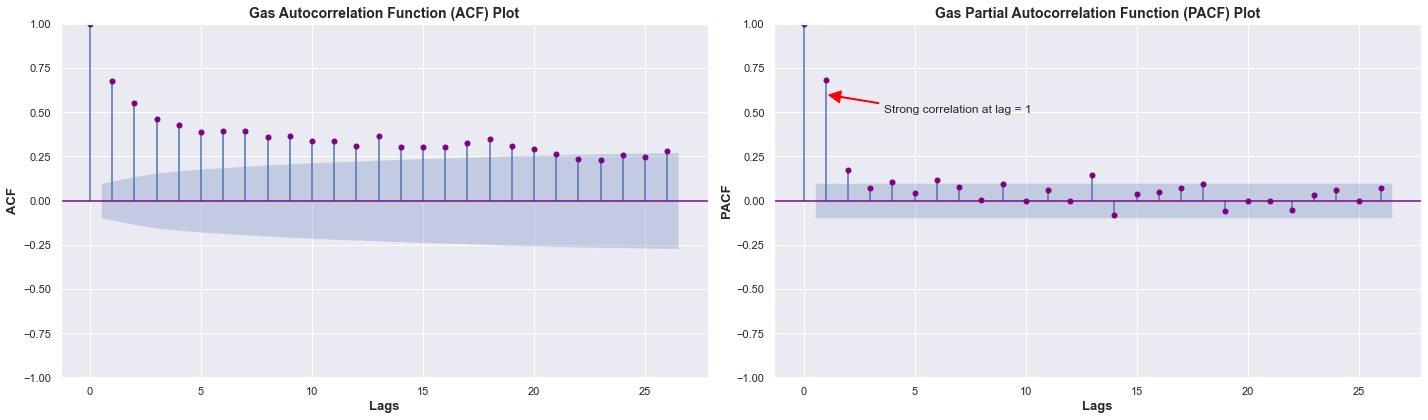

In [25]:
# import necessary libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# create figure and subplots for ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# plot ACF
plot_acf(gas, ax=ax1, color='purple')
ax1.set_title('Gas Autocorrelation Function (ACF) Plot', fontsize=14, fontweight='bold')
ax1.set_xlabel('Lags', fontsize=13, fontweight='bold')
ax1.set_ylabel('ACF', fontsize=13, fontweight='bold')

# plot PACF
plot_pacf(gas, ax=ax2, color='purple')
ax2.set_title('Gas Partial Autocorrelation Function (PACF) Plot', fontsize=14, fontweight='bold')
ax2.set_xlabel('Lags', fontsize=13, fontweight='bold')
ax2.set_ylabel('PACF', fontsize=13, fontweight='bold')
ax2.annotate('Strong correlation at lag = 1', xy=(1, 0.6), xycoords='data',
            xytext=(0.17, 0.75), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

# display the plots
plt.tight_layout()
plt.show()

- ACF and PACF plots are essential tools in time series analysis for understanding the relationship between a time series and its lagged values. 
- They help us identify underlying patterns, potential seasonality, and potential orders for ARIMA time series forecasting models. 

- <b>ACF plot</b>: 
    - The ACF plot displays the correlation between the time series at a specific lag and the time series at lag 0 (itself).
    - The ACF values is seen to <b>decay slowly</b>, indicating possible presence of trend/seasonality.
    
- <b>PACF plot</b>: 
    - The PACF plot focuses on the direct relationship between 2 data points while accounting for the influence of the intervening lags. 
    - In the plot, there is <b>a spike at lag 1</b>, and then gradually decreases with no other significant spikes, suggesting an AR(1) process. 

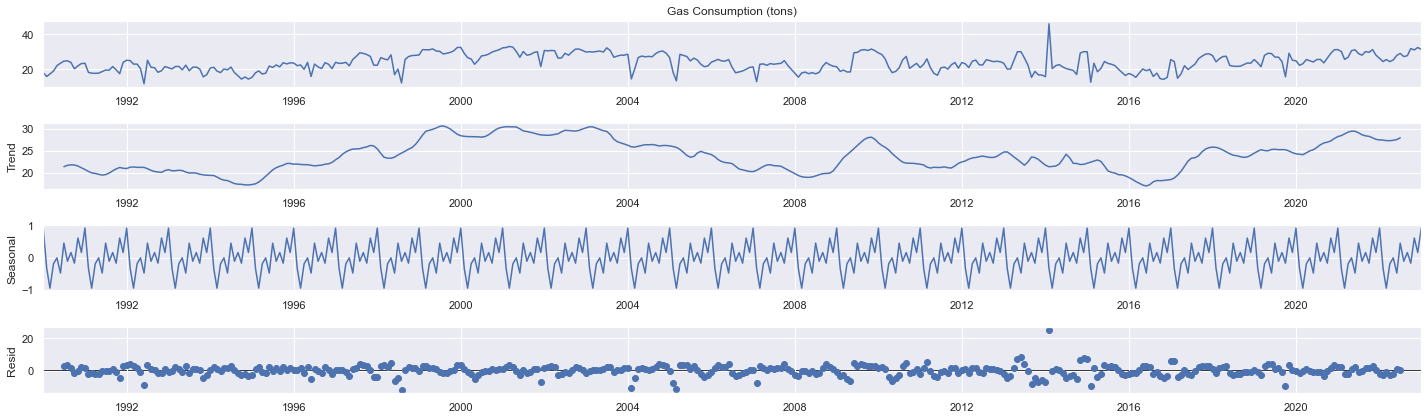

In [26]:
# decomposition plot
result = seasonal_decompose(gas, model='additive')
result.plot()
plt.show()

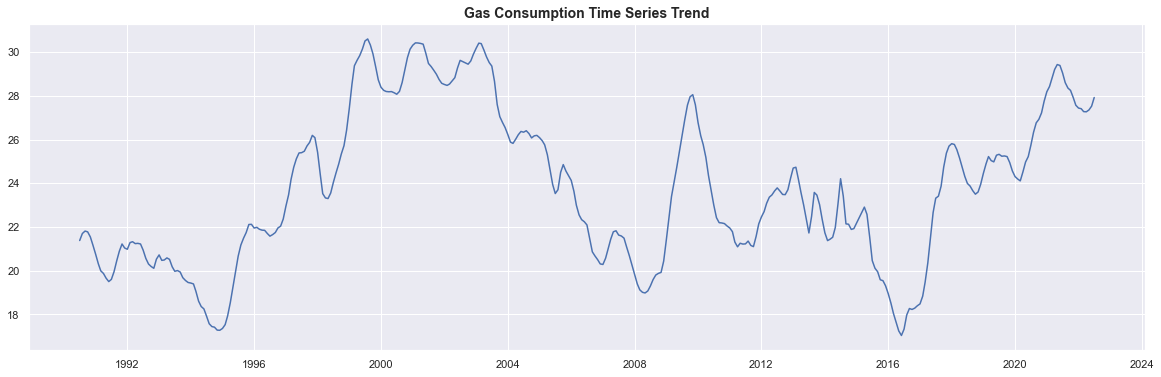

In [27]:
plt.figure(figsize=(20,6))
plt.plot(result.trend)
plt.title('Gas Consumption Time Series Trend', fontsize=14, fontweight='bold')
plt.show()

- Clear summary of Gas Consumption time series:  
- <b>Trend</b>: 
    - No trend.
- <b>Seasonality</b>: 
    - The seasonality component reveals repetitive patterns that occur at fixed intervals, often corresponding to specific seasons, months, or days of the week. 
    - In the plot, the seasonality component demonstrates regular fluctuations that repeat over time, indicating presence of seasonality. 
    - For gas consumption, the seasonality might indicate higher consumption during certain months, which could be attributed to factors like colder months leading to increased heating demand.
- <b>Residuals</b>: 
    - The residual component, also known as the "error" or "noise," represents the unexplained variability that remains after accounting for the trend and seasonality. 
    - It is the random fluctuation that cannot be attributed to the identified patterns. 
    - In this plot, the residuals exhibit fluctuations around zero, suggesting that most of the systematic patterns have been captured by the trend and seasonality components.

<h4>Visualizing time series of <b>Electricity</b> Consumption</h4>

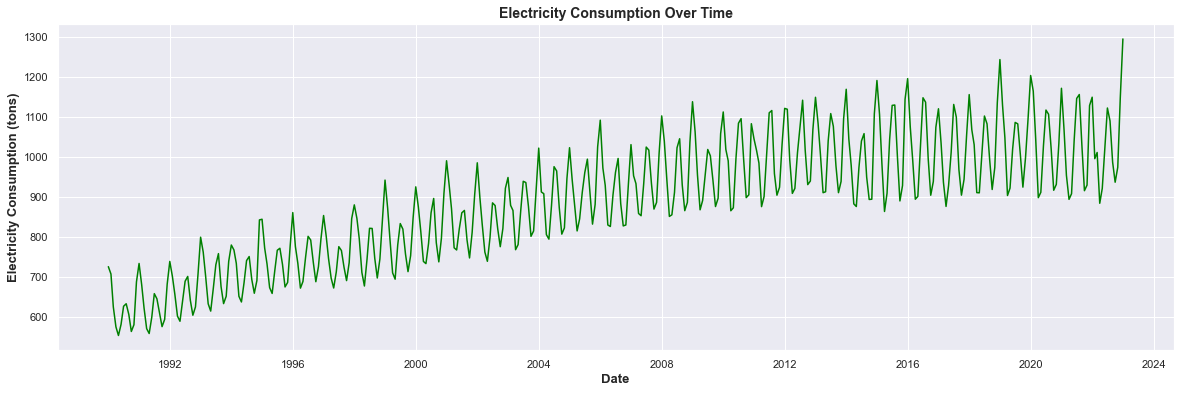

In [28]:
# line Plot
plt.figure(figsize=(20,6))
plt.plot(electricity.index, electricity, color='green')
plt.title('Electricity Consumption Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Electricity Consumption (tons)', fontsize=13, fontweight='bold')
plt.show()

- <b>Trend</b>: 
    - From the plot, it is evident that the time series has a clear upward trend, indicating an increase in electricity consumption from 1990 to 2023. 
- <b>Seasonality</b>: 
    - Generally, seasonality is observed.
    - There is a distinct consistent seasonal pattern in the data, as there are repeating patterns of similar magnitude at regular intervals, moving in an upward trend. 
- <b>Outlier</b>: 
    - No outlier/extreme points observed. 
- <b>Variability</b>: 
    - The Electricity Consumption plot showcases both short-term fluctuations and longer-term trends. 
    - On a shorter scale, there are frequent upward and downward movements, indicating variations in electricity consumption that might be influenced by factors such as daily or weekly routines, weather conditions, or seasonal changes in demand.
    - The plot also highlights broader trends (increase), which can be observed over more extended periods. 
    - These trends suggest shifts in electricity consumption over months or years, potentially linked to economic factors, technological advancements, or changes in consumer behavior.
    - The variability is moderate as spread of data points around / is decent. 

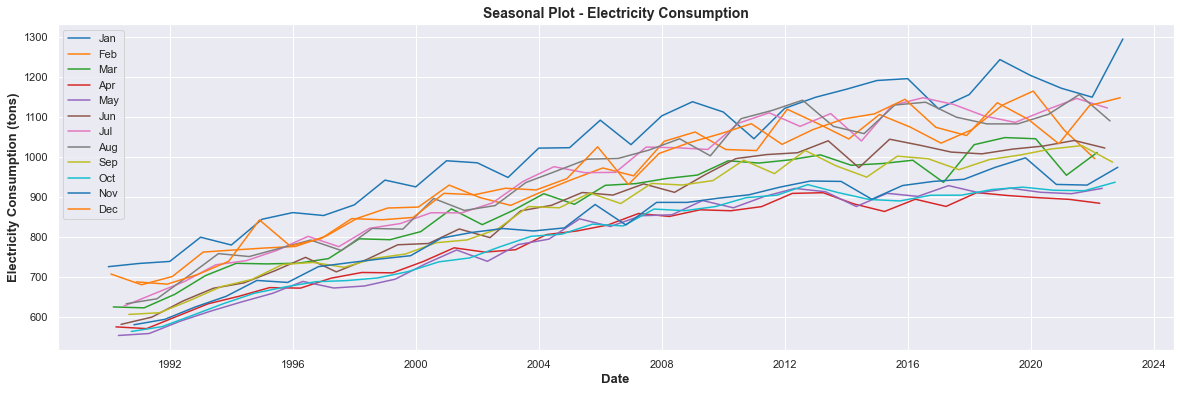

In [29]:
# manually create a list of distinct colors for each month
custom_palette = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown',
                  'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:brown', 'tab:green']

# create the seasonal plot with the custom palette
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,6)})
sns.lineplot(data=electricity, x=electricity.index, y=electricity, hue=electricity.index.month, palette='tab10')
plt.title('Seasonal Plot - Electricity Consumption', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Electricity Consumption (tons)', fontsize=13, fontweight='bold')
plt.legend(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], loc='upper left')
plt.show()

- From the seasonal plot, the plot shows a recurring pattern that recurs across each year, in an upward direction.
- Cyclic patterns are observed.
- The plot's consistent peaks and troughs suggest a consistent monthly cycle in electricity consumption.
- This cyclical pattern is indicative of seasonality, wherein certain months experience higher electricity consumption than others. 
- Notably, the months of December, January, February stand out as periods of elevated consumption, potentially associated with cooler weather and increased demand for heating systems and appliances.
- Spring months have decent electricity consumption levels. 

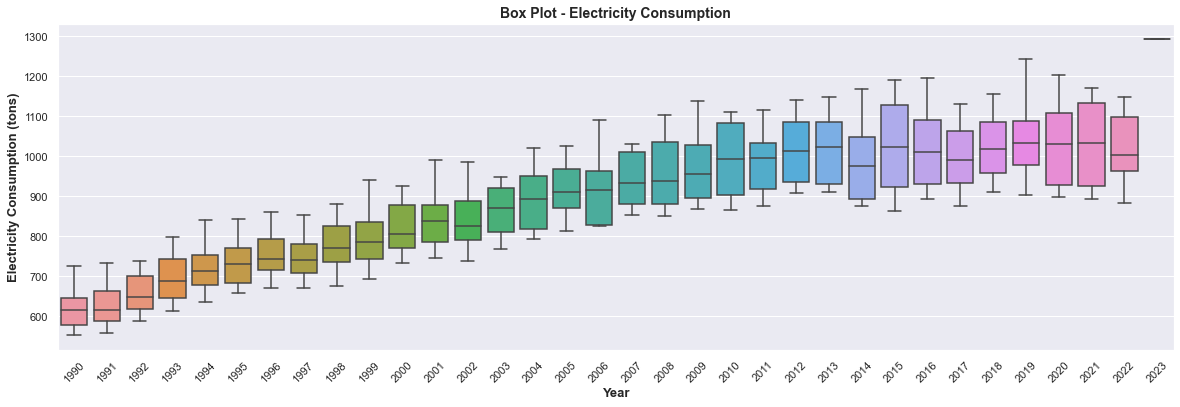

In [30]:
# box plot
plt.figure(figsize=(20,6))
sns.boxplot(x=electricity.index.year, y=electricity, data=electricity)
plt.title('Box Plot - Electricity Consumption', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=13, fontweight='bold')
plt.ylabel('Electricity Consumption (tons)', fontsize=13, fontweight='bold')
# rotate x-axis tick labels
plt.xticks(rotation=45)
plt.show()

- The medians depicted by the central lines within each boxplot tells us the typical electricity consumption for each year.
- Variation of electricity consumption levels seem to increase over the years. 
- There is a relatively consistent pattern, where the fluctuations of heights of boxplots seem to be quite consistent. 
- There are no outliers. 

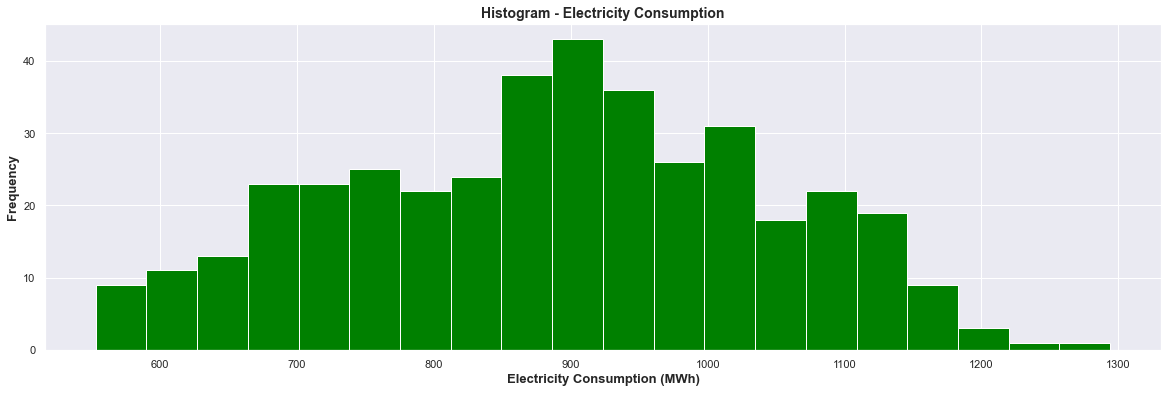

In [31]:
# histogram
plt.figure(figsize=(20,6))
plt.hist(electricity, bins=20, color='green')
plt.title('Histogram - Electricity Consumption', fontsize=14, fontweight='bold')
plt.xlabel('Electricity Consumption (MWh)', fontsize=13, fontweight='bold')
plt.ylabel('Frequency', fontsize=13, fontweight='bold')
plt.show()

- The histogram for Electricity Consumption shows a symmetric distribution (normal), with majority of values clustered towards the lower end of consumption.
- This indicates a pretty balanced distribution of electricity consumption levels.
- Most common electricity consumption value seems to be 900 MWh.
- Mean = median.

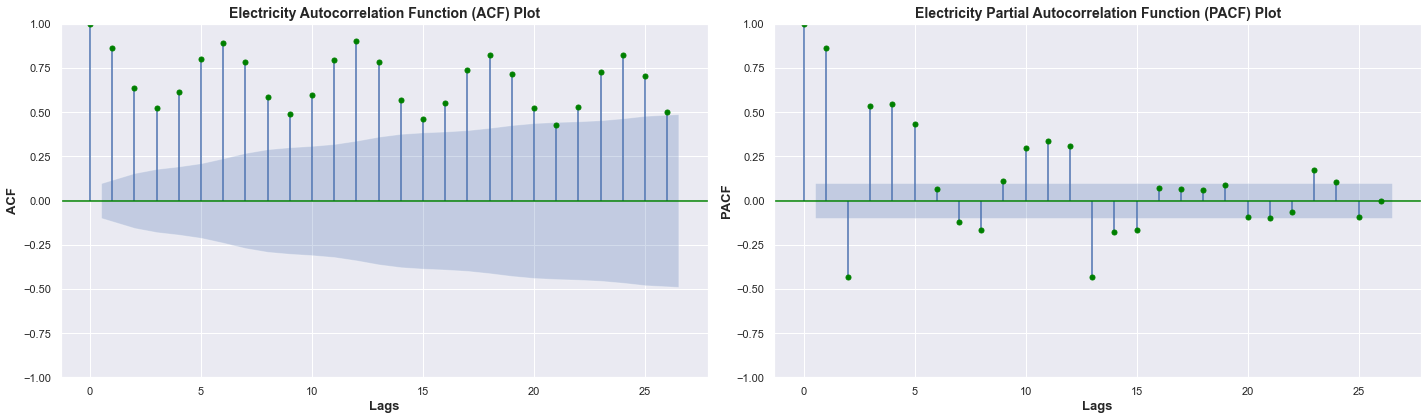

In [32]:
# import necessary libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# create figure and subplots for ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# plot ACF
plot_acf(electricity, ax=ax1, color='green')
ax1.set_title('Electricity Autocorrelation Function (ACF) Plot', fontsize=14, fontweight='bold')
ax1.set_xlabel('Lags', fontsize=13, fontweight='bold')
ax1.set_ylabel('ACF', fontsize=13, fontweight='bold')

# plot PACF
plot_pacf(electricity, ax=ax2, color='green')
ax2.set_title('Electricity Partial Autocorrelation Function (PACF) Plot', fontsize=14, fontweight='bold')
ax2.set_xlabel('Lags', fontsize=13, fontweight='bold')
ax2.set_ylabel('PACF', fontsize=13, fontweight='bold')

# display the plots
plt.tight_layout()
plt.show()

- The ACF and PACF plots seem to be unusual, indicating possibility of non-stationary properties. 

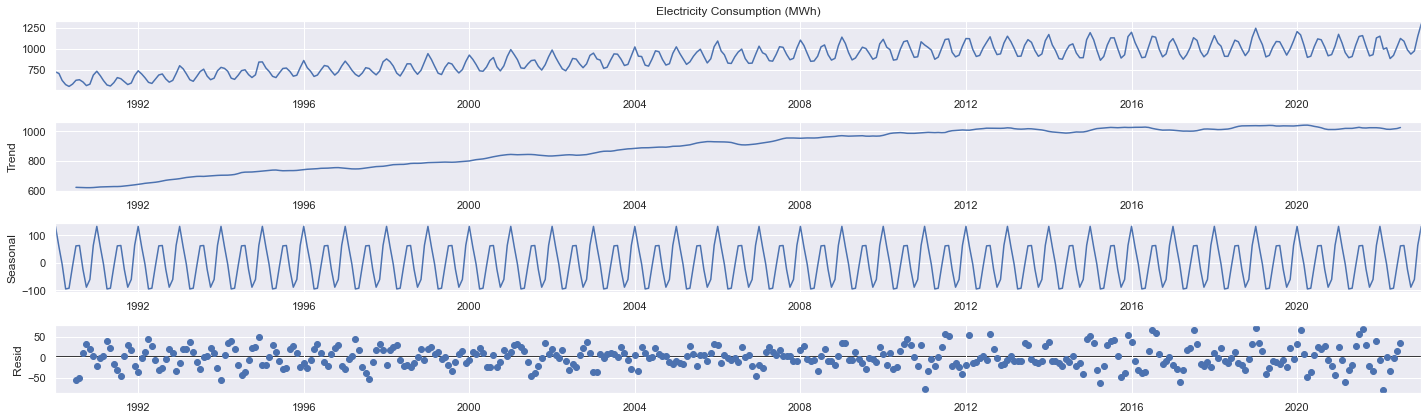

In [33]:
# time series decomposition plot
result = seasonal_decompose(electricity, model='additive')
result.plot()
plt.show()

- Clear summary of Electricity Consumption time series:  
- <b>Trend</b>: 
    - The trend component indicates an overall increasing consumption of electricity, possibly due to various external factors like weather changes or changing consumer behavior.
- <b>Seasonality</b>: 
    - The seasonality component reveals repetitive patterns that occur at fixed intervals, often corresponding to specific seasons, months, or days of the week. 
    - In the plot, the seasonality component demonstrates regular fluctuations that repeat over time, indicating presence of seasonality. 
    - The seasonality might indicate higher consumption during certain months, which could be attributed to factors like colder months leading to increased heating demand.
- <b>Residuals</b>: 
    - The residual component, also known as the "error" or "noise," represents the unexplained variability that remains after accounting for the trend and seasonality. 
    - It is the random fluctuation that cannot be attributed to the identified patterns. 
    - In this plot, the residuals exhibit fluctuations around zero, suggesting that most of the systematic patterns have been captured by the trend and seasonality components.
    The bottom panel displays the residual component, also known as the "error" or "noise." It represents the unexplained variability in the data that remains after the trend and seasonal components have been removed. 

<h4>Visualizing time series of <b>Water</b> Consumption</h4>

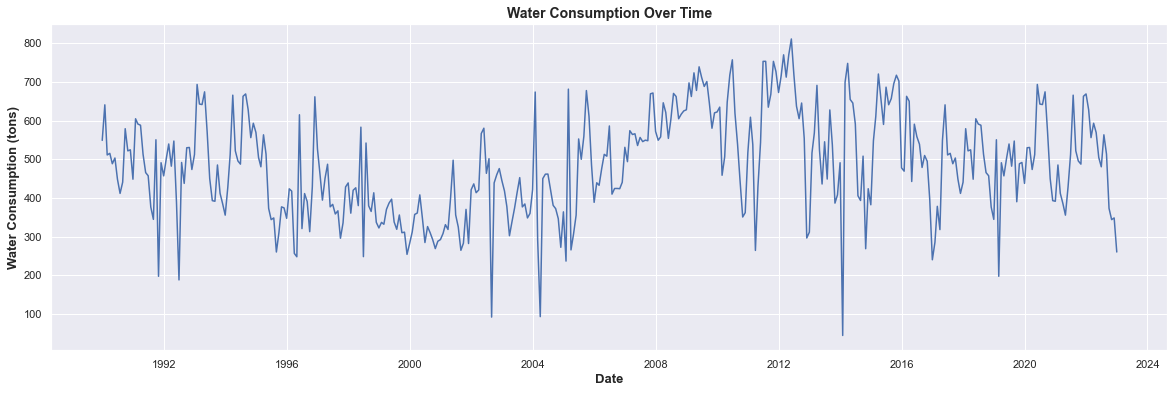

In [34]:
# line Plot
plt.figure(figsize=(20,6))
plt.plot(water.index, water)
plt.title('Water Consumption Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Water Consumption (tons)', fontsize=13, fontweight='bold')
plt.show()

- <b>Trend</b>: 
    - From the plot, it is evident that the time series has no clear upward or downward trend, as data is seen to be consistently fluctuating from 1990 to 2023. 
- <b>Seasonality</b>: 
    - Generally, seasonality is not clearly observed.
    - There is no distinct consistent seasonal pattern in the data, as there are no repeating patterns of similar magnitude at regular intervals. .
- <b>Variability</b>: 
    - The Water Consumption values vary over time, but causes are uncertain/random variation.

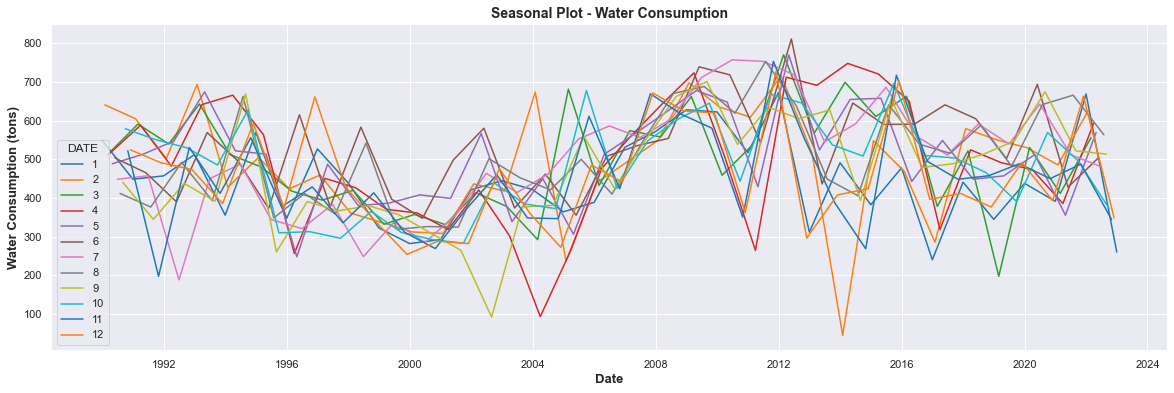

In [35]:
# seasonal Plot
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,6)})
sns.lineplot(data=water, x=water.index, y=water, hue=water.index.month, palette='tab10')
plt.title('Seasonal Plot - Water Consumption', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Water Consumption (tons)', fontsize=13, fontweight='bold')
plt.show()

- There could be a possibility of seasonality, although not much distinct pattern due to the spike in 2014 february. 
- Need to do further visualizations to back this up.  

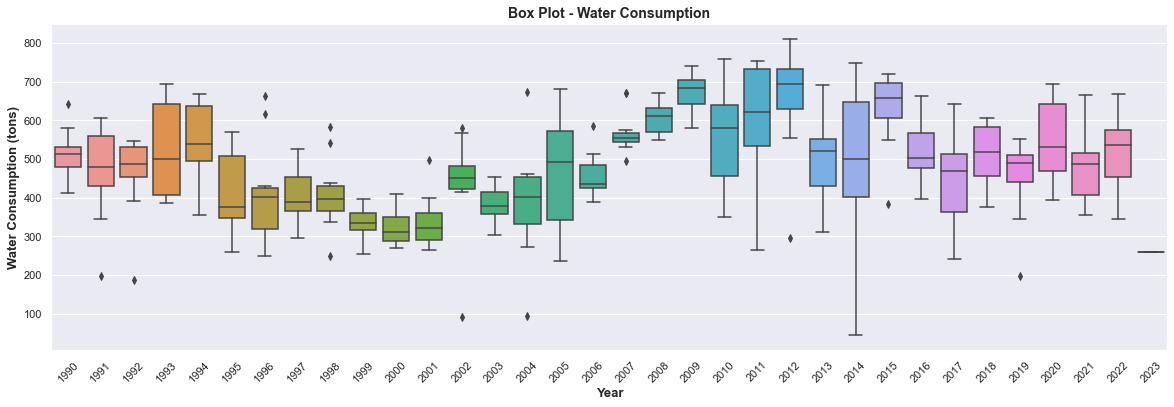

In [36]:
# box plot
plt.figure(figsize=(20,6))
sns.boxplot(x=water.index.year, y=water, data=water)
plt.title('Box Plot - Water Consumption', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=13, fontweight='bold')
plt.ylabel('Water Consumption (tons)', fontsize=13, fontweight='bold')
# rotate x-axis tick labels
plt.xticks(rotation=45)
plt.show()

- We can observe variations in water consumption from 1990 to 2023, as evident in the differing heights of the boxplots.
- There are a few outliers for various years, potentially indicating unique events or circumstances. 
- Fluctuating pattern is observed over the years.

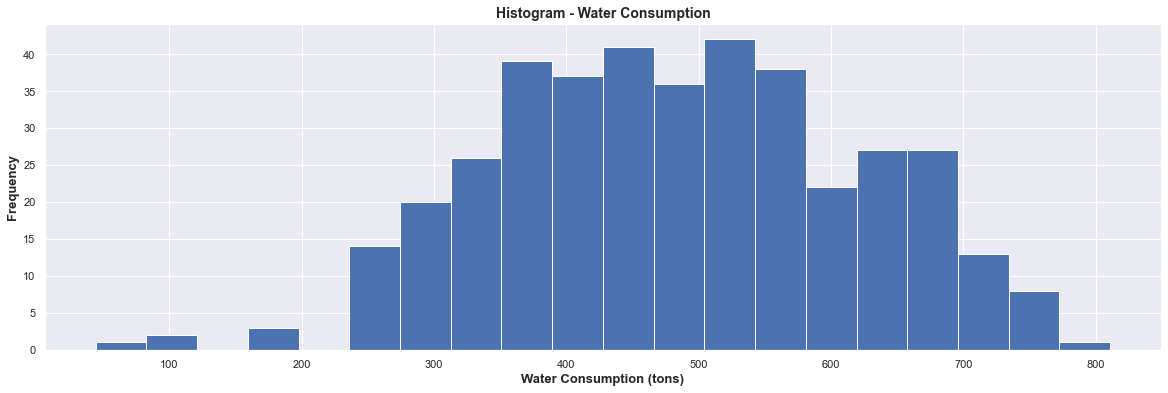

In [37]:
# histogram
plt.figure(figsize=(20,6))
plt.hist(water, bins=20)
plt.title('Histogram - Water Consumption', fontsize=14, fontweight='bold')
plt.xlabel('Water Consumption (tons)', fontsize=13, fontweight='bold')
plt.ylabel('Frequency', fontsize=13, fontweight='bold')
plt.show()

- Right-skewed distribution (positively-skewed), with majority of values clustered towards the lower end of consumption.
- Most instances observe relatively lower water consumption levels.
- Greatest is more than 500 tons (many large instances)
- Mean > median.
- There is higher variability. 

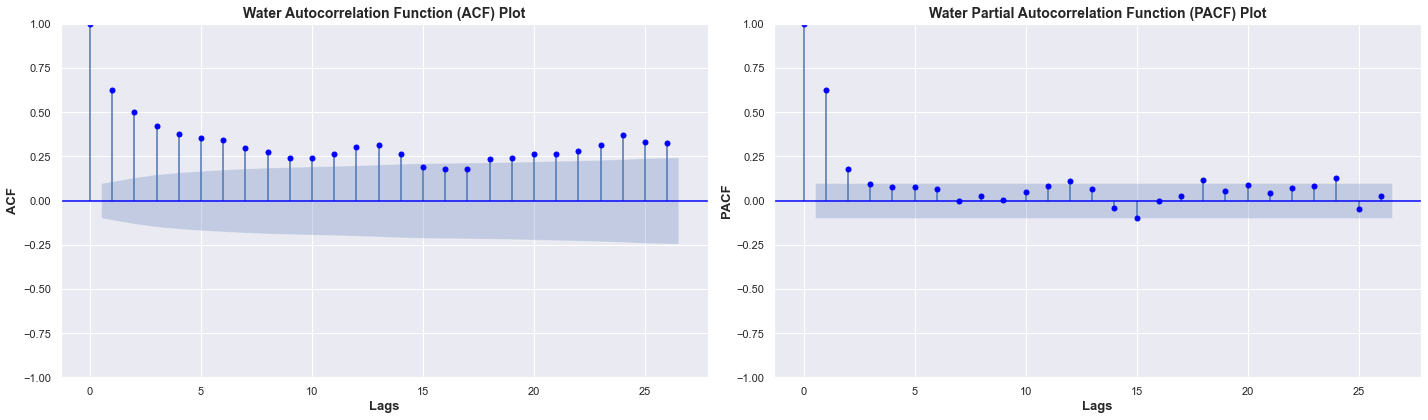

In [38]:
# import necessary libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# create figure and subplots for ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# plot ACF
plot_acf(water, ax=ax1, color='blue')
ax1.set_title('Water Autocorrelation Function (ACF) Plot', fontsize=14, fontweight='bold')
ax1.set_xlabel('Lags', fontsize=13, fontweight='bold')
ax1.set_ylabel('ACF', fontsize=13, fontweight='bold')

# plot PACF
plot_pacf(water, ax=ax2, color='blue')
ax2.set_title('Water Partial Autocorrelation Function (PACF) Plot', fontsize=14, fontweight='bold')
ax2.set_xlabel('Lags', fontsize=13, fontweight='bold')
ax2.set_ylabel('PACF', fontsize=13, fontweight='bold')

# display the plots
plt.tight_layout()
plt.show()

- <b>ACF plot</b>: 
    - The ACF plot displays the correlation between the time series at a specific lag and the time series at lag 0 (itself).
    - The ACF values is seen to <b>decay slowly</b>, thereafter fluctuating consistently.
    
- <b>PACF plot</b>: 
    - The PACF plot focuses on the direct relationship between 2 data points while accounting for the influence of the intervening lags. 
    - In the plot, there is <b>a spike at lag 1</b>, and then gradually decreases with no other significant spikes, suggesting an AR(1) process. 

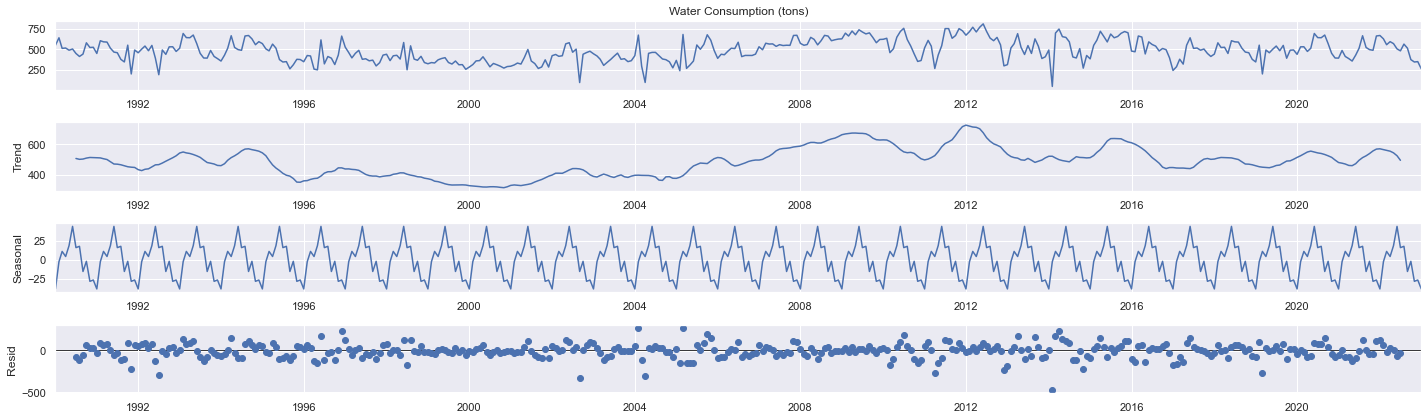

In [39]:
# decomposition plot
result = seasonal_decompose(water, model='additive')
result.plot()
plt.show()

- <b>Trend</b>: 
    - No trend, fluctuations.
- <b>Seasonality</b>: 
    - Regular fluctuations that repeat over time, indicating presence of seasonality. 
- <b>Residuals</b>: 
    - The residuals exhibit fluctuations around zero, suggesting that most of the systematic patterns have been captured by the trend and seasonality components.
Larger spikes in the residual component might indicate periods where the observed data deviates from the trend and seasonality.


<h3>Checking Time Series Stationarity</h3>

- Since some time-series models, such as ARIMA, assume that the underlying data is stationary, we need to check if the data is stationary to avoid inaccurate modelling results. 
- A time-series is stationary if it is not time-dependent:
    - Constant mean, variance, and covariance. 
- To check for stationarity, we do these three different approaches: 
    1. <b>Visual/graphical check</b>: Plot time series and check for trends or seasonality.
    2. <b>Basic statistics</b>: Split time series and compare the mean and variance of each partition.
    3. <b>Statistical test</b>: Augmented Dickey Fuller test (ADF).

<h4>1. Graphical Check</h4>

- Line Plot: 
    - Gas and water has no obvious trends or patterns, indicating stationarity.
    - Electricity has an increasing trend, indicating possibility of non-stationarity.

- Seasonal Plot:
    - All three shows possibility of seasonality, need to do further visualizations. 

- Autocorrelation Plot (ACF): 
    - Gas and water's ACF values shows trend of decaying to zero direction, indicating stationarity.
    - Electricity does not show any decaying trend, only fluctuations, indicating non-stationarity. 

- Partial Autocorrelation Plot (PACF): 
    - Gas and water's PACF values shows trend of decaying to zero direction, indicating stationarity.
    - Electricity does not show any decaying trend, only fluctuations, indicating non-stationarity. 

- Histogram: 
    - Interestingly, only electricity showed obvious bell-shaped curve, indicating stationarity. 

- Box Plot: 
    - Medians are closer in range for Gas and water and not for electricity.

- Decomposition Plot: 
    - All three have residuals that fluctuate around zero without any obvious patterns, however electricity's residuals are further apart from zero. 

- Although it seems like only electricity shows non-stationarity, we need to do more test to prove, this alone is insufficient. 

<h4>2. Basic Statistics</h4>

- For stationary datasets, no matter which part the data is at, both groups will have the same mean and variance. 

In [40]:
# gas consumption statistics
X1 = gas.iloc[:len(gas)//2]
X2 = gas.iloc[len(gas)//2:]

print(f'For Gas Consumption:\ngroup 1 mean = {X1.mean():.2f}, group 2 mean = {X2.mean():.2f}, \ngroup 1 variance = {X1.var():.2f}, group 2 variance = {X2.var():.2f}')

For Gas Consumption:
group 1 mean = 24.28, group 2 mean = 23.29, 
group 1 variance = 24.48, group 2 variance = 23.23


- The mean values of gas consumption in both groups are relatively close, with group 1 having a slightly higher mean. Since the difference in means is not significant, we can infer that the overall average gas consumption does not exhibit a significant shift between the two periods. 
- The variance values of gas consumption in both groups are also relatively similar, indicating that the variability of gas consumption is pretty consistent between the two periods.
- As such, from the basic statistics, the similarity in both means and variances of the groups supports the idea of stationarity, where the data has a relatively constant and stable mean and variance over time. 

In [41]:
X3 = electricity.iloc[:len(electricity)//2]
X4 = electricity.iloc[len(electricity)//2:]

print(f'For Electricity Consumption:\ngroup 1 mean = {X3.mean():.2f}, group 2 mean = {X4.mean():.2f}, \ngroup 1 variance = {X3.var():.2f}, group 2 variance = {X4.var():.2f}')

For Electricity Consumption:
group 1 mean = 774.04, group 2 mean = 1002.33, 
group 1 variance = 12208.96, group 2 variance = 9083.62


- The mean values of electricity consumption between both groups are notably different, with group 2 having a significantly higher mean as compared to group 1. This difference in mean indicates that there may be a significant shift or trend in the electricity consumption over the two periods. 
- The variance values of electricity consumption also differ between the two groups. While both groups show relatively high variances, the difference in variances could suggest varying levels of volatility or variability in electricity consumption. 
- As such, from the basic statistics, the inconsistency of the means and variances between both groups are not sufficient to prove stationarity.

In [42]:
X5 = water.iloc[:len(water)//2]
X6 = water.iloc[len(water)//2:]

print(f'For Water Consumption:\ngroup 1 mean = {X5.mean():.2f}, group 2 mean = {X6.mean():.2f}, \ngroup 1 variance = {X5.var():.2f}, group 2 variance = {X6.var():.2f}')

For Water Consumption:
group 1 mean = 426.87, group 2 mean = 542.75, 
group 1 variance = 13118.77, group 2 variance = 16079.41


- The mean values of water consumption between the two groups are noticeably different, with group 2 having a higher mean compared to group 1. This difference in means suggests that there may be a shift or trend in water consumption over the two periods.
- The variance values of water consumption also differ between the two groups, with group 2 having a higher variance than group 1. The varying variances could indicate differing levels of variability in water consumption over the two periods.
- As such, from the basic statistics, the varying means and variances indicate that the data may not be stationary.

- Although the basic statistics of the means and variances of the two groups is one way to prove stationarity, it is not good enough.
- We should also use a more formal stationarity test such as the Augmented Dickey-Fuller (ADF) test, which can provide more definitive insights and confirm the stationarity of the data. 

<h4>3. Statistical Test: ADF test/unit root test (most accurate)</h4>

- This test determines how strongly a time series is defined by a trend.
- Null hypothesis: Time series can be represented by a unit root, not stationary.

- P-value > 0.05: fail to reject the null hyp, data has a unit root and is non-stat.
- P-value < 0.05: reject null hyp, data does not have a unit root, and is stat. 

- Test Statistic: a more negative (lower) TS indicates stronger evidence against the null hypothesis of non-stationarity. If the ADF statistic is more negative and the p-value is less than the chosen significance level (e.g., 0.05), you can conclude that the series is stationary. Otherwise, if the ADF statistic is less negative or positive and the p-value is greater than the significance level, the series is likely non-stationary.

In [43]:
# Augmented Dickey-Fuller Test
# import from statsmodel
from statsmodels.tsa.stattools import adfuller

result1 = adfuller(gas)
result2 = adfuller(electricity)
result3 = adfuller(water)

print('Gas Consumption: Test Statistic: %f' % result1[0])
print('Gas Consumption: P-Value: %f' % result1[1])
print('\n')
print('Electricity Consumption: Test Statistic: %f' % result2[0])
print('Electricity Consumption: P-Value: %f' % result2[1])
print('\n')
print('Water Consumption: Test Statistic: %f' % result3[0])
print('Water Consumption: P-Value: %f' % result3[1])

Gas Consumption: Test Statistic: -3.404374
Gas Consumption: P-Value: 0.010811


Electricity Consumption: Test Statistic: -2.256981
Electricity Consumption: P-Value: 0.186218


Water Consumption: Test Statistic: -4.684846
Water Consumption: P-Value: 0.000090


- Gas Consumption:
    - Test statistic of -3.404374 suggests that the Gas Consumption time series has a lower likelihood of being non-stationary. 
    - The P-Value of 0.010811 is smaller than the significance level (0.05), indicating that the null hypothesis of non-stationarity is rejected. 
    - Therefore, based on the ADF test, the Gas Consumption time series appears to be stationary.

- Electricity Consumption:
    - Test statistic of -2.256981 is negative, but not as strongly negative as desired for a clear indication of stationarity. 
    - The P-Value of 0.186218 is greater than the 0.05 significance level, indicating that the null hypothesis is not rejected.
    - Therefore, based on the ADF test, the Electricity Consumption time series appears to be non-stationary.
    
- Water Consumption:
    - Test statistic of -4.684846 is more negative than the critical values, indicating a stronger case against the null hypothesis of non-stationarity. 
    - The very low P-Value of 0.000090 provides strong evidence to reject the null hypothesis. 
    - As such, the Water Consumption time series is stationary based on the ADF test.

<h3>Make the Electricity time series stationary by differencing</h3>

Electricity Consumption before differencing P-value: 0.186218
Electricity Consumption after differencing P-value: 0.000000




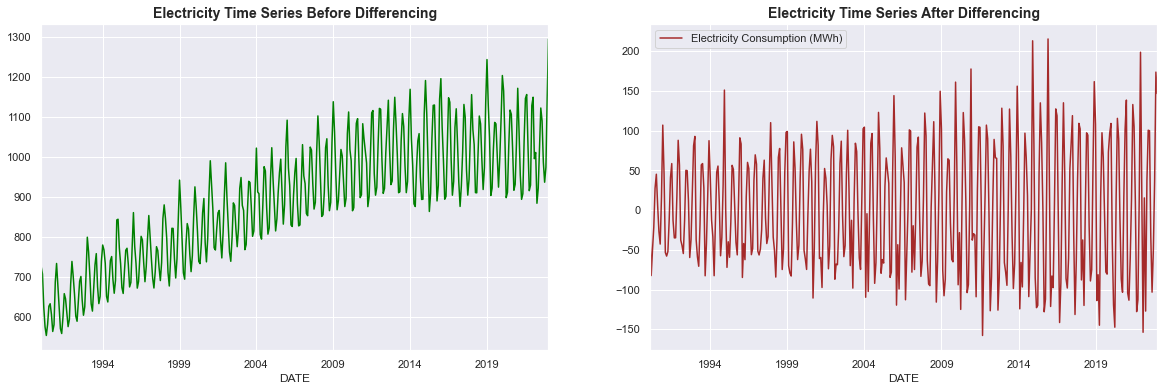

In [44]:
# import differencing libraries from statsmodel 
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import adfuller

# perform differencing operation
diff_electricity = diff(electricity, k_diff=1)
result3 = adfuller(electricity)
result4 = adfuller(diff_electricity)

print('Electricity Consumption before differencing P-value: %f' % result3[1])
print('Electricity Consumption after differencing P-value: %f' % result4[1])
print('\n')

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
electricity.plot(ax=ax[0], color='green')
diff_electricity.plot(ax=ax[1], color='brown')
ax[0].set_title('Electricity Time Series Before Differencing', fontsize=14, fontweight='bold')
ax[1].set_title('Electricity Time Series After Differencing', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

- Differencing computes the difference between consecutive observations in the time series.
- No more presence of trend and seasonality (weakened).
- Mean, variance, and covariance of time series looks constant now. 
- Time series is now ready for accurate modelling and forecasting!

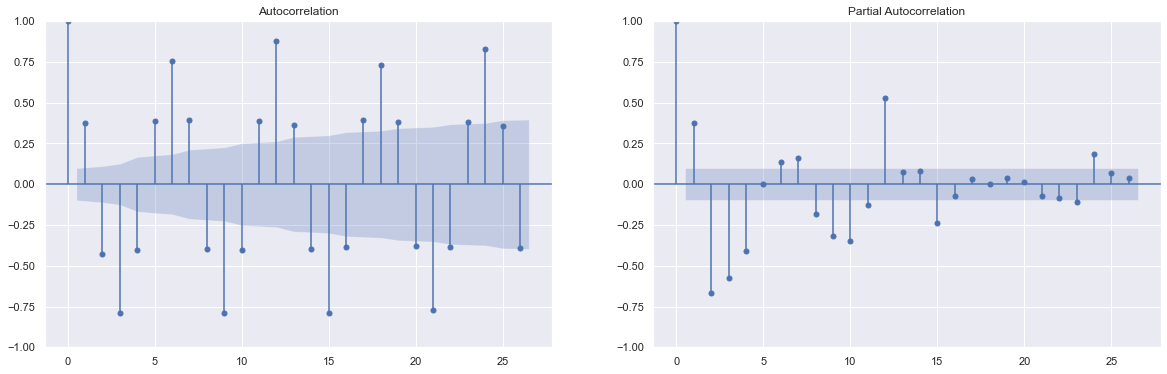

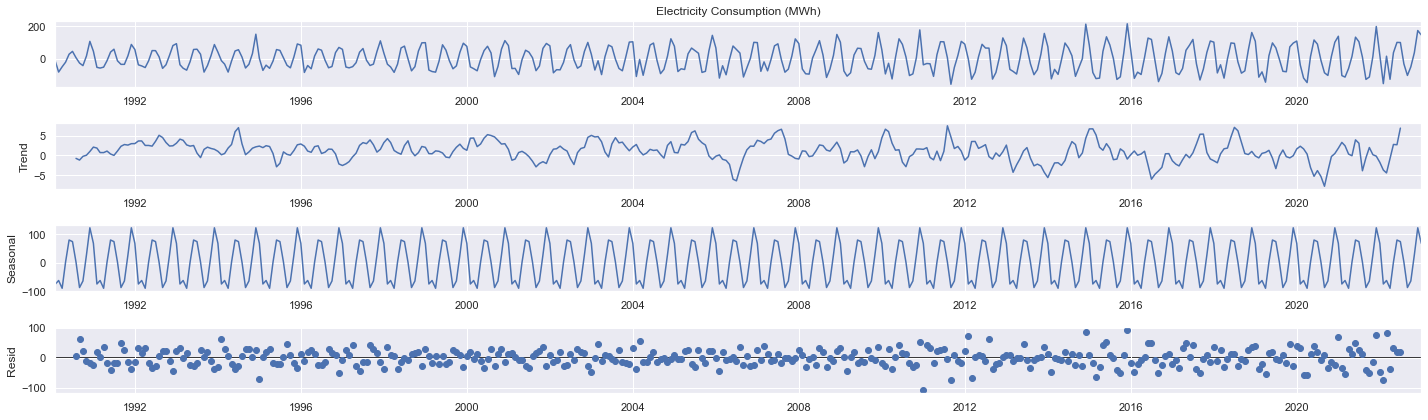

In [45]:
# autocorrelation and partial autocorrelation plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
plot_acf(diff_electricity, ax=ax1)
plot_pacf(diff_electricity, ax=ax2)
plt.show()

# decomposition plot
result = seasonal_decompose(diff_electricity, model='additive')
result.plot()
plt.show()

<h1><center>Performing Time Series Forecasting</center></h1>

<h3>Split data into training and testing sets</h3>

In [46]:
# define the split date
split_date = '2018-01-01'  

# split the data into train and test sets based on the split date
train_data = df[df.index < split_date]
test_data = df[df.index >= split_date]

# print the sizes of the train and test sets
print(f"Train set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

# split into respective energy consumption categories
train_gas = train_data['Gas Consumption (tons)']
test_gas = test_data['Gas Consumption (tons)']

# split the differenced electricity data into training and testing sets
train_electricity = diff_electricity[diff_electricity.index < split_date]
test_electricity = diff_electricity[diff_electricity.index >= split_date]

train_water = train_data['Water Consumption (tons)']
test_water = test_data['Water Consumption (tons)']

Train set size: 336
Test set size: 61


<h3>1. Simple Moving Average Model (Baseline Model)</h3>

- A Simple Moving Average (SMA) model is a basic time series forecasting method that calculates the average value of a series over a specified window of time. 
- It is used to smooth out fluctuations in the data and provide a simple representation of the underlying trend.
- The SMA models will only act as baseline models by providing simple and easy predictions (starting point).
- SMA can capture basic trends and seasonality, smoothing out short-term fluctuations, highlight overall general trend of data's movement overtime.
- However, SMA may not capture complex patterns, outliers, or sudden changes in the data, which can lead to inaccurate forecasts in certain situations. They cannot perform better than other models such as ARIMA and Exponential Smoothing which take into account a wide range of factors and patterns in the data. 

<h4>Gas Consumption SMA Model</h4>

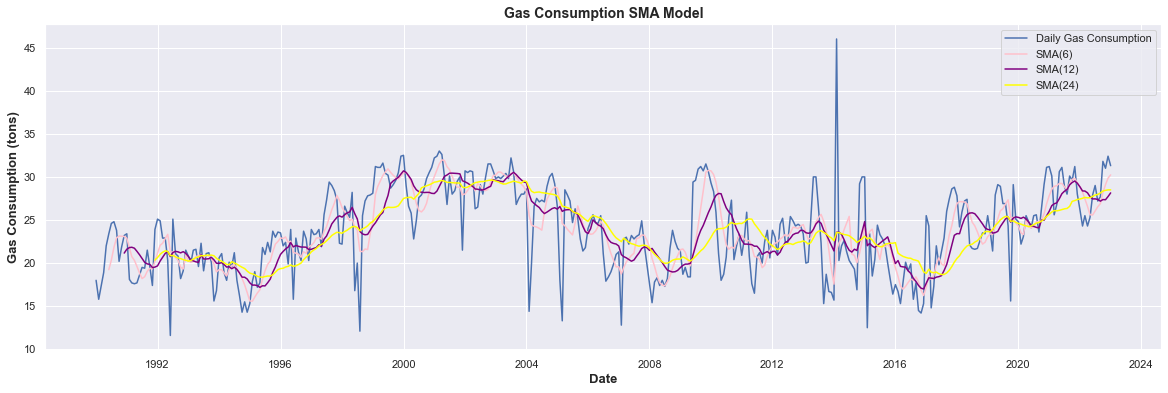

In [54]:
# plot daily gas consumption against SMAs
# calculate the Simple Moving Average 
sma_1 = gas.rolling(window=6).mean() # 6 months
sma_2 = gas.rolling(window=12).mean() # yearly (12 months)
sma_3 = gas.rolling(window=24).mean() # every 2 years

# plot the original data and the SMAs
plt.figure(figsize=(20,6))
plt.plot(gas.index, gas, label='Gas Consumption')
plt.plot(gas.index, sma_1, color='pink')
plt.plot(gas.index, sma_2, color='purple')
plt.plot(gas.index, sma_3, color='yellow')
plt.title('Gas Consumption SMA Model', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Gas Consumption (tons)', fontsize=13, fontweight='bold')
plt.legend(labels=['Daily Gas Consumption', 'SMA(6)', 'SMA(12)', 'SMA(24)'])
plt.show()

<h4>Electricity Consumption SMA Model</h4>

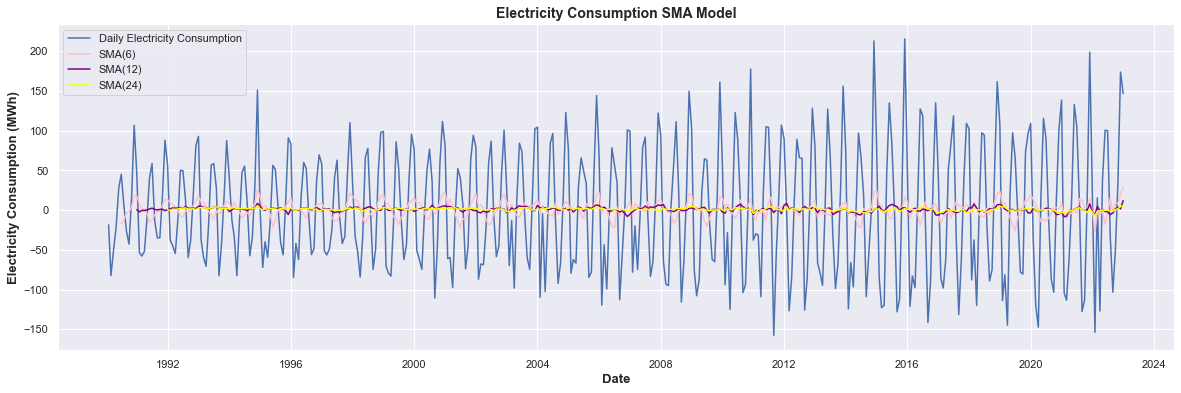

In [55]:
# plot daily electricity consumption against SMAs (make sure to use stationary one)
# calculate the Simple Moving Average 
sma_1 = diff_electricity.rolling(window=6).mean() # 6 months
sma_2 = diff_electricity.rolling(window=12).mean() # yearly (12 months)
sma_3 = diff_electricity.rolling(window=24).mean() # every 2 years

# plot the original data and the SMAs
plt.figure(figsize=(20,6))
plt.plot(diff_electricity.index, diff_electricity, label='Electricity Consumption')
plt.plot(diff_electricity.index, sma_1, color='pink')
plt.plot(diff_electricity.index, sma_2, color='purple')
plt.plot(diff_electricity.index, sma_3, color='yellow')
plt.title('Electricity Consumption SMA Model', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Electricity Consumption (MWh)', fontsize=13, fontweight='bold')
plt.legend(labels=['Daily Electricity Consumption', 'SMA(6)', 'SMA(12)', 'SMA(24)'])
plt.show()

<h4>Water Consumption SMA Model</h4>

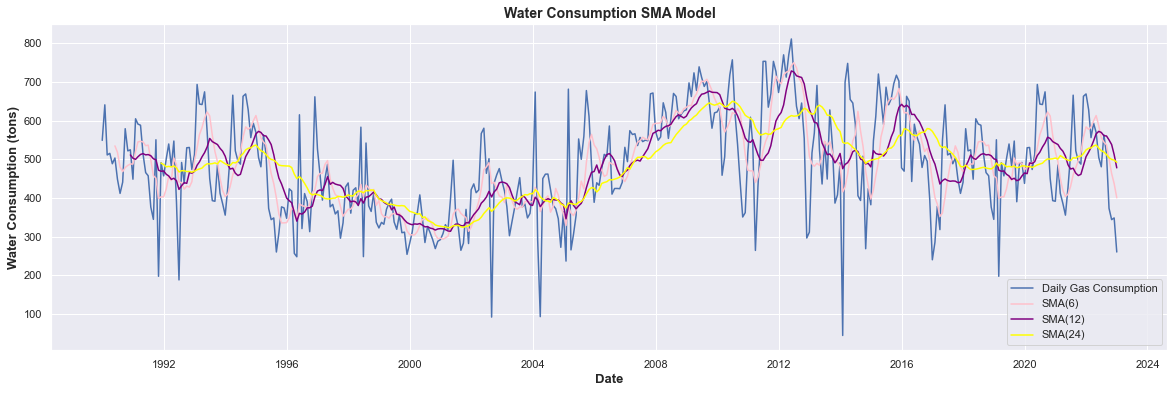

In [56]:
# plot daily water consumption against SMAs
# calculate the Simple Moving Average 
sma_1 = water.rolling(window=6).mean() # 6 months
sma_2 = water.rolling(window=12).mean() # yearly (12 months)
sma_3 = water.rolling(window=24).mean() # every 2 years

# plot the original data and the SMAs
plt.figure(figsize=(20,6))
plt.plot(water.index, water, label='Water Consumption')
plt.plot(water.index, sma_1, color='pink')
plt.plot(water.index, sma_2, color='purple')
plt.plot(water.index, sma_3, color='yellow')
plt.title('Water Consumption SMA Model', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Water Consumption (tons)', fontsize=13, fontweight='bold')
plt.legend(labels=['Daily Gas Consumption', 'SMA(6)', 'SMA(12)', 'SMA(24)'])
plt.show()

- The SMA(6) responds more quickly to short-term changes in gas consumption, closely following the original data but with reduced noise. 
- The SMA(12) line provides a smoother trend that captures longer-term patterns while reducing noise even further, as evident for SMA(24) as well. 
- No clear trend, just fluctuations, seasonality is somewhat observed. 
- The larger the window, the smoother the plot.

<h3>2. Exponential Smoothing Models</h3>

- In statsmodels, there are <b>three types of exponential smoothing methods</b>.
    - <b>Simple</b> Exponential Smoothing (SES) (single)
        - Most basic form of exponential smoothing. 
        - It is suitable for time series data with no trend or seasonality. 
        - SES uses a single smoothing parameter (alpha) to exponentially weight past observations. 
        - It's appropriate for data with a constant mean and variance.
    - <b>Holt's Linear</b> Exponential Smoothing (double)
        - Extends SES by adding a linear trend component to the level component. 
        - It introduces an additional smoothing parameter (beta) to control the smoothing of the trend. 
        - This method is suitable for data with a linear trend and no seasonality.
    - <b>Holt-Winters</b> Exponential Smoothing (triple)
        - A more comprehensive method that incorporates level, trend, and seasonality components. 
        - It has three smoothing parameters: alpha, beta, and gamma. Holt-Winters can be used with either additive or multiplicative seasonality, depending on the nature of the data.

<h4>Simple Exponential Smoothing Model</h4>

<h5>Gas Consumption Simple Exponential Smoothing Model</h5>

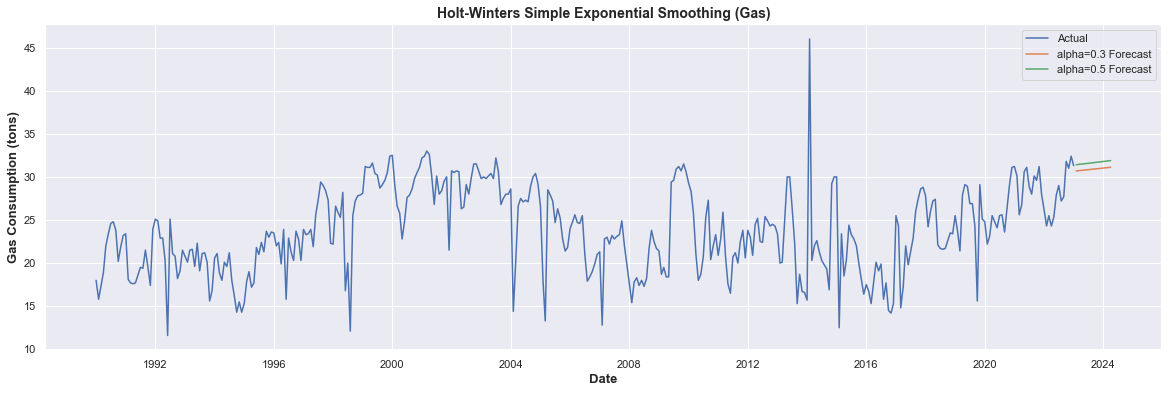

In [57]:
# import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

simpleGasModel1 = Holt(gas).fit(smoothing_level=0.3)
simpleGasModel2 = Holt(gas).fit(smoothing_level=0.5)

pred1 = simpleGasModel1.forecast(steps=15)
pred2 = simpleGasModel2.forecast(steps=15)

fig, ax = plt.subplots(figsize=(20,6))
ax.plot(gas, label='Actual')
ax.plot(pred1, label='alpha=0.3 Forecast')
ax.plot(pred2, label='alpha=0.5 Forecast')
plt.legend()
plt.title('Holt-Winters Simple Exponential Smoothing (Gas)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Gas Consumption (tons)', fontsize=13, fontweight='bold')
plt.show()

<h5>Electricity Consumption Simple Exponential Smoothing Model</h5>

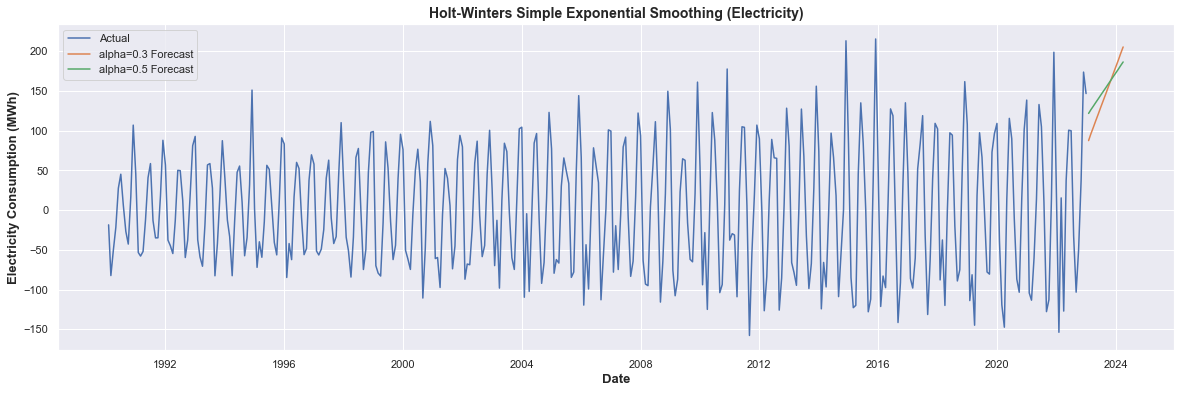

In [58]:
# import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

simpleElectricityModel1 = Holt(diff_electricity).fit(smoothing_level=0.3)
simpleElectricityModel2 = Holt(diff_electricity).fit(smoothing_level=0.5)

pred1 = simpleElectricityModel1.forecast(steps=15)
pred2 = simpleElectricityModel2.forecast(steps=15)

fig, ax = plt.subplots(figsize=(20,6))
ax.plot(diff_electricity, label='Actual')
ax.plot(pred1, label='alpha=0.3 Forecast')
ax.plot(pred2, label='alpha=0.5 Forecast')
plt.legend()
plt.title('Holt-Winters Simple Exponential Smoothing (Electricity)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Electricity Consumption (MWh)', fontsize=13, fontweight='bold')
plt.show()

<h5>Water Consumption Simple Exponential Smoothing Model</h5>

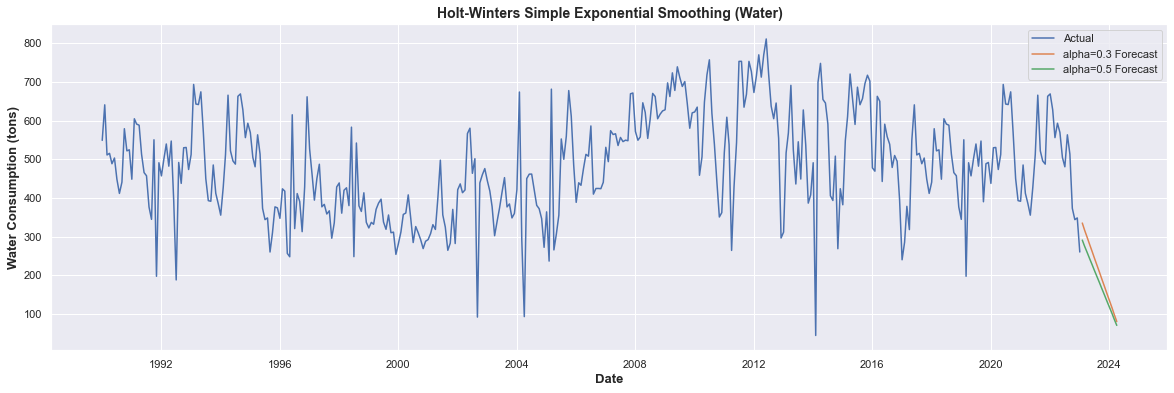

In [59]:
# import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

simpleWaterModel1 = Holt(water).fit(smoothing_level=0.3)
simpleWaterModel2 = Holt(water).fit(smoothing_level=0.5)

pred1 = simpleWaterModel1.forecast(steps=15)
pred2 = simpleWaterModel2.forecast(steps=15)

fig, ax = plt.subplots(figsize=(20,6))
ax.plot(water, label='Actual')
ax.plot(pred1, label='alpha=0.3 Forecast')
ax.plot(pred2, label='alpha=0.5 Forecast')
plt.legend()
plt.title('Holt-Winters Simple Exponential Smoothing (Water)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Water Consumption (tons)', fontsize=13, fontweight='bold')
plt.show()

- The model generally predicts an increase in gas and electricity consumptions in the future, and a decrease for water.

- SES is not the best model as:
    - Lacks flexibility by assuming time series has a constant level and cannot properly handle trends and seasonality.
    - Assumes time series is noise-free.
    - Results in forecasts which lag behind/overshoot values.
    - Overall not very accurate and should try using seasonal model.

<h4>Holt's Linear Exponential Smoothing Model (Seasonal)</h4>

<h5>Gas Consumption Seasonal ES Model</h5>

In [60]:
# import Exponential Smoothing and performance metrics
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# hyperparameter tuning using testing set
# initialize variables for best RMSE and MAPE, and ideal seasonal period
best_rmse = float('inf')
best_mape = float('inf')
best_seasonal_period = None

# define different values of seasonal_periods to try
seasonal_periods = [12, 24, 36]

# loop through different values of seasonal_periods
for seasonal_period in seasonal_periods:
    # build and fit the ETS model on the training set
    gas_ets_model = ES(train_gas, trend='add', seasonal='add', seasonal_periods=seasonal_period).fit()

    # forecast based on the testing set
    gas_ets_pred = gas_ets_model.forecast(len(test_gas))

    # calculate RMSE for the testing set
    rmse = np.sqrt(mean_squared_error(test_gas, gas_ets_pred))

    # calculate MAPE for the testing set
    mape = mean_absolute_percentage_error(test_gas, gas_ets_pred)

    # update best parameters if current model has lower RMSE and MAPE
    if rmse + mape < best_rmse + best_mape:
        best_rmse = rmse
        best_mape = mape
        best_seasonal_period = seasonal_period

    print(f'Seasonal Period: {seasonal_period}')
    print(f'RMSE: {rmse:.3f}\nMAPE: {mape:.3f}%')
    print('\n')

print('-----------------------')
# print the best parameters and metrics
print('Best Seasonal Period:', best_seasonal_period)
print(f'Best RMSE: {best_rmse:.3f}')
print(f'Best MAPE: {best_mape:.3f}%')

Seasonal Period: 12
RMSE: 3.695
MAPE: 0.124%


Seasonal Period: 24
RMSE: 3.721
MAPE: 0.121%


Seasonal Period: 36
RMSE: 3.417
MAPE: 0.112%


-----------------------
Best Seasonal Period: 36
Best RMSE: 3.417
Best MAPE: 0.112%


- From the above code, it is proven that the best seasonal period is 36, producing the lowest RMSE and MAPE values, indicating highest accuracy for gas consumption forecasting. 

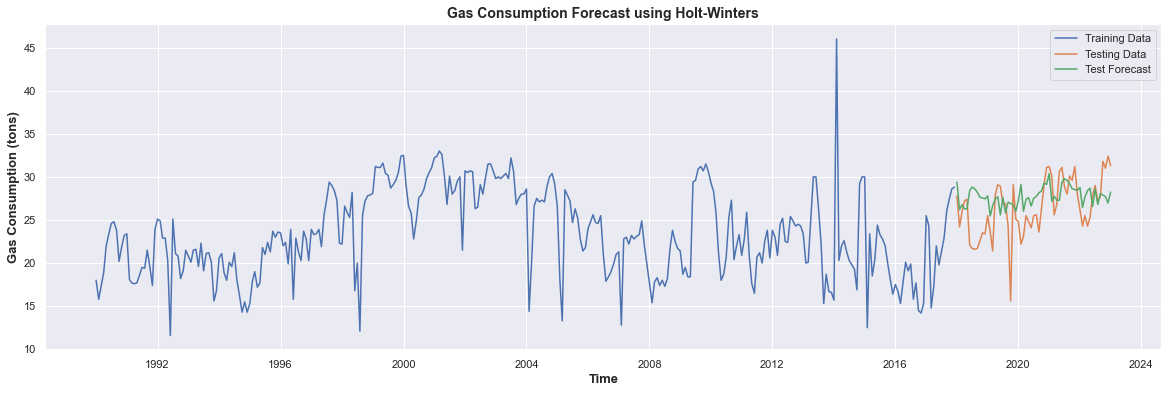

In [90]:
# model evaluation using test set using seasonal period=36 (best)
gas_ets_model = ES(train_gas, trend='add', seasonal='add', seasonal_periods=36).fit()
gas_ets_pred = gas_ets_model.forecast(len(test_gas))

# plot the graph on test set
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(train_gas, label='Training Data')
ax.plot(test_gas, label='Testing Data')
ax.plot(gas_ets_pred, label='Test Forecast')
ax.set_xlabel('Time', fontsize=13, fontweight='bold')
ax.set_ylabel('Gas Consumption (tons)', fontsize=13, fontweight='bold')
ax.set_title('Gas Consumption Forecast using Holt-Winters', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

- The blue line represents the training data, showing the historical gas consumption pattern. 
- The orange line corresponds to the actual gas consumption during the test period, which serves as the ground truth for evaluation. 
- The green line represents the model's forecasted gas consumption for the same test period.
- By comparing the orange and green lines, it is evident that the forecasted line shows similar fluctuating patterns as shown by the test data line. However, there are some deviations with regards to the ranges of the two lines. 
- This indicates that the model has only partially captured the underlying patterns and variations in the data and it is not fully accurate.

<h5>Electricity Consumption Seasonal ES Model</h5>

In [63]:
# import Exponential Smoothing and performance metrics
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# hyperparameter tuning using testing set
# initialize variables for best RMSE and MAPE, and ideal seasonal period
best_rmse = float('inf')
best_mape = float('inf')
best_seasonal_period = None

# define different values of seasonal_periods to try
seasonal_periods = [12, 24, 36]

# loop through different values of seasonal_periods
for seasonal_period in seasonal_periods:
    # build and fit the ETS model on the training set
    electricity_ets_model = ES(train_electricity, trend='add', seasonal='add', seasonal_periods=seasonal_period).fit()

    # forecast based on the testing set
    electricity_ets_pred = electricity_ets_model.forecast(len(test_electricity))

    # calculate RMSE for the testing set
    rmse = np.sqrt(mean_squared_error(test_electricity, electricity_ets_pred))

    # calculate MAPE for the testing set
    mape = mean_absolute_percentage_error(test_electricity, electricity_ets_pred)

    # update best parameters if current model has lower RMSE and MAPE
    if rmse + mape < best_rmse + best_mape:
        best_rmse = rmse
        best_mape = mape
        best_seasonal_period = seasonal_period

    print(f'Seasonal Period: {seasonal_period}')
    print(f'RMSE: {rmse:.3f}\nMAPE: {mape:.3f}%')
    print('\n')

print('-----------------------')
# print the best parameters and metrics
print('Best Seasonal Period:', best_seasonal_period)
print(f'Best RMSE: {best_rmse:.3f}')
print(f'Best MAPE: {best_mape:.3f}%')

Seasonal Period: 12
RMSE: 36.413
MAPE: 1.277%


Seasonal Period: 24
RMSE: 36.584
MAPE: 0.681%


Seasonal Period: 36
RMSE: 35.844
MAPE: 1.372%


-----------------------
Best Seasonal Period: 36
Best RMSE: 35.844
Best MAPE: 1.372%


- From the above code, it is proven that the best seasonal period is 36, producing the lowest RMSE and MAPE values, indicating highest accuracy for electricity consumption forecasting. 

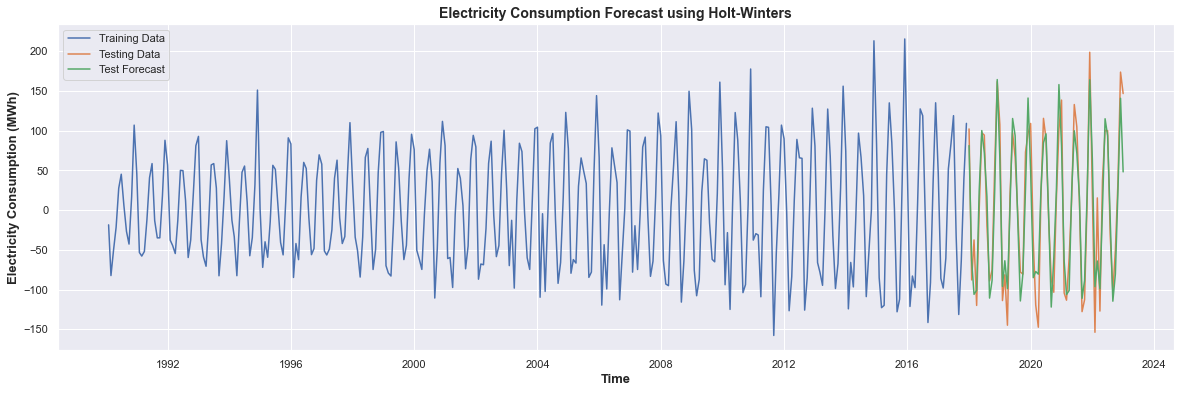

In [65]:
# model evaluation using test set using seasonal period=36 (best)
electricity_ets_model = ES(train_electricity, trend='add', seasonal='add', seasonal_periods=36).fit()
electricity_ets_pred = electricity_ets_model.forecast(len(test_electricity))

# plot the graph on test set
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(train_electricity, label='Training Data')
ax.plot(test_electricity, label='Testing Data')
ax.plot(electricity_ets_pred, label='Test Forecast')
ax.set_xlabel('Time', fontsize=13, fontweight='bold')
ax.set_ylabel('Electricity Consumption (MWh)', fontsize=13, fontweight='bold')
ax.set_title('Electricity Consumption Forecast using Holt-Winters', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

- For electricity consumption, the model actually forecasted the values pretty accurately as evident in the graph above.
- The forecasted line not only shows similar fluctuating patterns, it also lies closely to the test data line. 
- Therefore, the model has quite accurately captured the underlying patterns and variations in the data.

<h5>Water Consumption Seasonal ES Model</h5>

In [66]:
# import Exponential Smoothing and performance metrics
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# hyperparameter tuning using testing set
# initialize variables for best RMSE and MAPE, and ideal seasonal period
best_rmse = float('inf')
best_mape = float('inf')
best_seasonal_period = None

# define different values of seasonal_periods to try
seasonal_periods = [12, 24, 36]

# loop through different values of seasonal_periods
for seasonal_period in seasonal_periods:
    # build and fit the ETS model on the training set
    water_ets_model = ES(train_water, trend='add', seasonal='add', seasonal_periods=seasonal_period).fit()

    # forecast based on the testing set
    water_ets_pred = water_ets_model.forecast(len(test_water))

    # calculate RMSE for the testing set
    rmse = np.sqrt(mean_squared_error(test_water, water_ets_pred))

    # calculate MAPE for the testing set
    mape = mean_absolute_percentage_error(test_water, water_ets_pred)

    # update best parameters if current model has lower RMSE and MAPE
    if rmse + mape < best_rmse + best_mape:
        best_rmse = rmse
        best_mape = mape
        best_seasonal_period = seasonal_period

    print(f'Seasonal Period: {seasonal_period}')
    print(f'RMSE: {rmse:.3f}\nMAPE: {mape:.3f}%')
    print('\n')

print('-----------------------')
# print the best parameters and metrics
print('Best Seasonal Period:', best_seasonal_period)
print(f'Best RMSE: {best_rmse:.3f}')
print(f'Best MAPE: {best_mape:.3f}%')

Seasonal Period: 12
RMSE: 106.272
MAPE: 0.178%


Seasonal Period: 24
RMSE: 139.063
MAPE: 0.218%


Seasonal Period: 36
RMSE: 144.030
MAPE: 0.230%


-----------------------
Best Seasonal Period: 12
Best RMSE: 106.272
Best MAPE: 0.178%


- It is proven that seasonal period of 12 is the best for water consumption ES model.

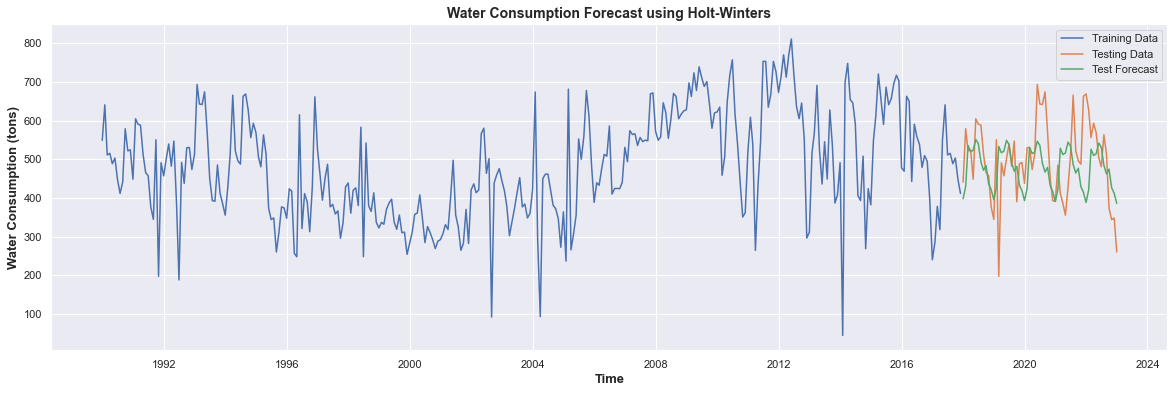

In [68]:
# model evaluation using test set using seasonal period=12 (best)
water_ets_model = ES(train_water, trend='add', seasonal='add', seasonal_periods=12).fit()
water_ets_pred = water_ets_model.forecast(len(test_water))

# plot the graph on test set
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(train_water, label='Training Data')
ax.plot(test_water, label='Testing Data')
ax.plot(water_ets_pred, label='Test Forecast')
ax.set_xlabel('Time', fontsize=13, fontweight='bold')
ax.set_ylabel('Water Consumption (tons)', fontsize=13, fontweight='bold')
ax.set_title('Water Consumption Forecast using Holt-Winters', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

- It is evident that the forecasted line shows similar fluctuating patterns as shown by the test data line. 
- However, there are some deviations with regards to the ranges of the two lines. 
- This indicates that the model has only partially captured the underlying patterns and variations in the data and it is not fully accurate.

<h3>3. ARIMA Forecast Model: ARIMA (p,d,q)</h3>

<h4>Gas Consumption ARIMA Model</h4>

In [69]:
# import ARIMA and performance metrics
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

# define ranges for p, d, and q: ARIMA(p,d,q)
p_values = range(0, 3)  
d_values = range(0, 2) 
q_values = range(0, 3)  

# initialize variables for best model parameters and performance metrics
best_aic = float("inf")
best_rmse = float("inf")
best_mape = float("inf")
best_params = None

# loop through all combinations of p, d, and q
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                # fit ARIMA model
                gas_model = ARIMA(train_gas, order=order)
                gas_model_fit = gas_model.fit()

                # calculate AIC
                aic = gas_model_fit.aic

                # generate predictions
                pred_gas = gas_model_fit.predict(start=test_gas.index[0], end=test_gas.index[-1])

                # calculate MAPE and RMSE
                mape = mean_absolute_percentage_error(test_gas, pred_gas)
                mse = mean_squared_error(test_gas, pred_gas)
                rmse = np.sqrt(mse)

                # update best parameters and metrics if AIC, RMSE, MAPE is lower
                if aic + rmse + mape < best_aic + best_rmse + best_mape:
                    best_aic = aic
                    best_params = order
                    best_rmse = rmse
                    best_mape = mape
            except:
                continue

print("Best ARIMA Parameters:", best_params)
print(f'Best RMSE: {best_rmse:.2f}')
print(f'Best MAPE: {best_mape:.2f}%')

# fit ARIMA model with best parameters
best_gas_model = ARIMA(train_gas, order=best_params)
best_gas_model_fit = best_gas_model.fit()
best_gas_model_fit.summary()

Best ARIMA Parameters: (1, 1, 1)
Best RMSE: 4.82
Best MAPE: 0.14%


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     Gas Consumption (tons)   No. Observations:                  336
Model:                     ARIMA(1, 1, 1)   Log Likelihood                -904.301
Date:                    Sun, 13 Aug 2023   AIC                           1814.601
Time:                            13:56:10   BIC                           1826.044
Sample:                        01-01-1990   HQIC                          1819.163
                             - 12-01-2017                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4357      0.042     10.436      0.000       0.354       0.518
ma.L1         -0.9049      0.036    -25.451      0.000      -0.975      -0.835
sigma2        12.9128      0.503     25.661      0.000      11.927      13.899
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):              1902.13
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               2.35   Skew:                             0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

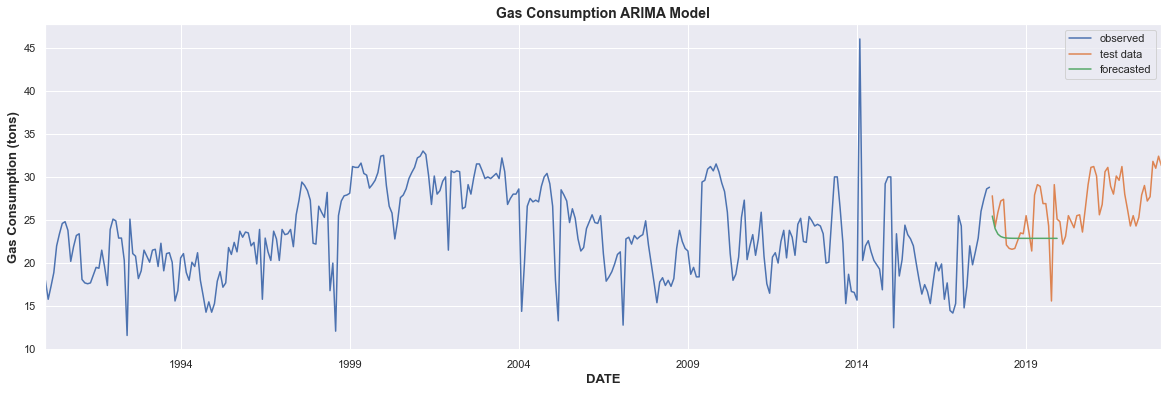

In [93]:
finalGasArima = ARIMA(train_gas, order=[1,1,1]).fit()

pred = pd.DataFrame(data=finalGasArima.forecast(steps=24))

ax = train_gas.plot(figsize=(20,6))
test_gas.plot(ax=ax)
pred.plot(ax=ax)
ax.legend(labels=['observed', 'test data', 'forecasted'])
ax.set_title('Gas Consumption ARIMA Model', fontsize=14, fontweight='bold')
ax.set_xlabel('DATE', fontsize=13, fontweight='bold')
ax.set_ylabel('Gas Consumption (tons)', fontsize=13, fontweight='bold')
plt.show()

<h4>Electricity Consumption ARIMA Model</h4>

In [74]:
# Import necessary libraries
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

# Define ranges for p, d, and q: ARIMA(p, d, q)
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Initialize variables for best model parameters and performance metrics
best_aic = float("inf")
best_rmse = float("inf")
best_mape = float("inf")
best_params = None

# Loop through all combinations of p, d, and q
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                # Fit ARIMA model on training data
                electricity_model = ARIMA(train_electricity, order=order)
                electricity_model_fit = electricity_model.fit()

                # Calculate AIC
                aic = electricity_model_fit.aic

                # Generate predictions
                pred_electricity = electricity_model_fit.predict(start=test_electricity.index[0], end=test_electricity.index[-1])

                # Calculate MAPE and RMSE
                mape = mean_absolute_percentage_error(test_electricity, pred_electricity)
                mse = mean_squared_error(test_electricity, pred_electricity)
                rmse = np.sqrt(mse)

                # Update best parameters and metrics if AIC performance metrics are lower
                if aic + rmse + mape < best_aic + best_rmse + best_mape:
                    best_aic = aic
                    best_params = order
                    best_rmse = rmse
                    best_mape = mape
            except:
                continue

# Print the best model parameters and performance metrics
print("Best ARIMA Parameters:", best_params)
print(f'Best RMSE: {best_rmse:.2f}')
print(f'Best MAPE: {best_mape:.2f}%')

# Fit ARIMA model with best parameters
best_electricity_model = ARIMA(train_electricity, order=best_params)
best_electricity_model_fit = best_electricity_model.fit()
best_electricity_model_fit.summary()

Best ARIMA Parameters: (2, 0, 2)
Best RMSE: 45.29
Best MAPE: 2.85%


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     Electricity Consumption (MWh)   No. Observations:                  335
Model:                            ARIMA(2, 0, 2)   Log Likelihood               -1638.092
Date:                           Sun, 13 Aug 2023   AIC                           3288.185
Time:                                   14:03:48   BIC                           3311.070
Sample:                               02-01-1990   HQIC                          3297.308
                                    - 12-01-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2800      1.662      0.770      0.441      -1.977       4.537
ar.L1          0.9986      0.002    632.452      0.000       0.996       1.002
ar.L2         -1.0000    6.6e-05  -1.51e+04      0.000      -1.000      -1.000
ma.L1         -1.0607      0.036    -29.756      0.000      -1.131      -0.991
ma.L2          0.9999      0.067     15.003      0.000       0.869       1.131
sigma2      1007.6711      0.000   8.64e+06      0.000    1007.671    1007.671
===================================================================================
Ljung-Box (L1) (Q):                   4.21   Jarque-Bera (JB):                12.62
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               1.93   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.45e+23. Standard errors may be unstable.
"""

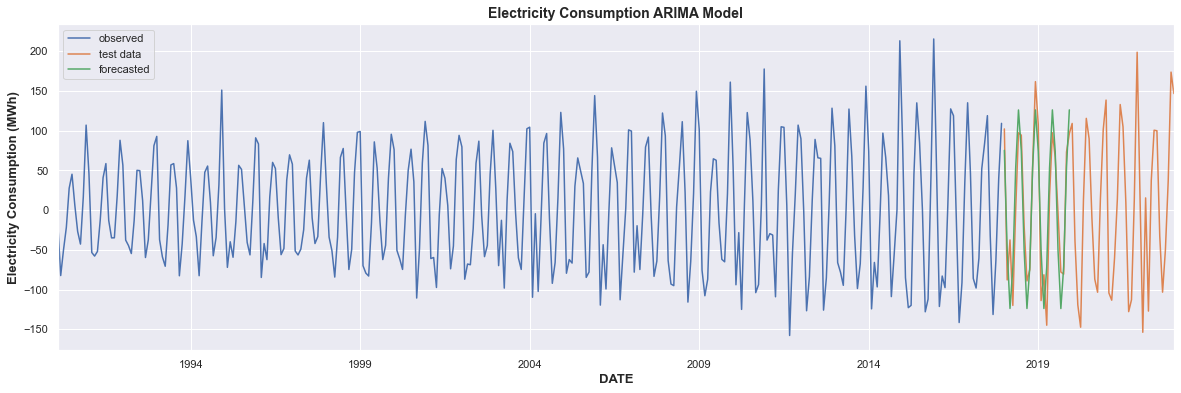

In [101]:
# Electricity ARIMA
finalElectricityARIMA = ARIMA(train_electricity, order=(2,0,2)).fit()

pred = pd.DataFrame(data=finalElectricityARIMA.forecast(steps=24))

ax = train_electricity.plot(figsize=(20,6))
test_electricity.plot(ax=ax)
pred.plot(ax=ax)
ax.legend(labels=['observed',  'test data', 'forecasted'])
ax.set_title('Electricity Consumption ARIMA Model', fontsize=14, fontweight='bold')
ax.set_xlabel('DATE', fontsize=13, fontweight='bold')
ax.set_ylabel('Electricity Consumption (MWh)', fontsize=13, fontweight='bold')
plt.show()

<h4>Water Consumption ARIMA Model</h4>

In [81]:
# import ARIMA and performance metrics
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

# define ranges for p, d, and q: ARIMA(p,d,q)
p_values = range(0, 3)  
d_values = range(0, 2) 
q_values = range(0, 3)  

# initialize variables for best model parameters and performance metrics
best_aic = float("inf")
best_rmse = float("inf")
best_mape = float("inf")
best_params = None

# loop through all combinations of p, d, and q
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                # Fit ARIMA model on training data 
                water_model = ARIMA(train_water, order=order)
                water_model_fit = water_model.fit()

                # calculate AIC
                aic = water_model_fit.aic
                
                # Generate predictions
                pred_water = water_model_fit.predict(start=test_water.index[0], end=test_water.index[-1])
                
                # calculate MAPE and RMSE
                mape = mean_absolute_percentage_error(test_water, pred_water)
                mse = mean_squared_error(test_water, pred_water)
                rmse = np.sqrt(mse)

                # update best parameters and metrics if AIC performance metrics is lower
                if aic + rmse + mape < best_aic + best_rmse + best_mape:
                    best_aic = aic
                    best_params = order
                    best_rmse = rmse
                    best_mape = mape
            except:
                continue

print("Best ARIMA Parameters:", best_params)
print(f'Best RMSE: {best_rmse:.2f}')
print(f'Best MAPE: {best_mape:.2f}%')

# fit ARIMA model with best parameters
best_water_model = ARIMA(train_water, order=best_params)
best_water_model_fit = best_water_model.fit()
best_water_model_fit.summary()

Best ARIMA Parameters: (1, 1, 2)
Best RMSE: 102.29
Best MAPE: 0.18%


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:     Water Consumption (tons)   No. Observations:                  336
Model:                       ARIMA(1, 1, 2)   Log Likelihood               -2028.534
Date:                      Sun, 13 Aug 2023   AIC                           4065.068
Time:                              14:07:10   BIC                           4080.325
Sample:                          01-01-1990   HQIC                          4071.150
                               - 12-01-2017                                         
Covariance Type:                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5765      0.143      4.018      0.000       0.295       0.858
ma.L1         -1.1060      0.148     -7.491      0.000      -1.395      -0.817
ma.L2          0.1605      0.119      1.346      0.178      -0.073       0.394
sigma2      1.061e+04    574.149     18.480      0.000    9484.986    1.17e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               101.51
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.45   Skew:                            -0.28
Prob(H) (two-sided):                  0.05   Kurtosis:                         5.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

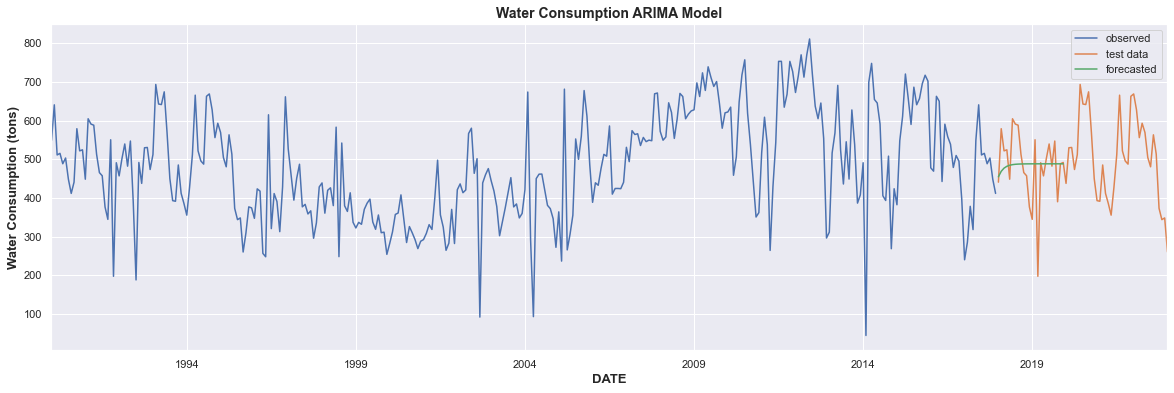

In [98]:
# Water ARIMA
finalWaterARIMA = ARIMA(train_water, order=(1,1,2)).fit()

pred = pd.DataFrame(data=finalWaterARIMA.forecast(steps=24))

ax = train_water.plot(figsize=(20,6))
test_water.plot(ax=ax)
pred.plot(ax=ax)
ax.legend(labels=['observed', 'test data', 'forecasted'])
ax.set_title('Water Consumption ARIMA Model', fontsize=14, fontweight='bold')
ax.set_xlabel('DATE', fontsize=13, fontweight='bold')
ax.set_ylabel('Water Consumption (tons)', fontsize=13, fontweight='bold')
plt.show()

- As shown in the graphs above, although the normal ARIMA model successfully forecasted electricity consumption values, it shows limited predictions for gas and water.
- This shows that the normal ARIMA is not an ideal model for this analysis as: 
    - It assumes that the relationship between past and future values of the time series is linear, as shown in the gas and water consumption plots.
    - It cannot handle seasonality very well. 

<h3>4. SARIMA Forecast Model</h3>

- Instead of normal ARIMA, let us use a time series forecasting model that extends the basic ARIMA model to include seasonality. 
- SARIMA is designed to handle time series data that exhibit both non-seasonal and seasonal patterns.

<h4>Gas Consumption SARIMAX Model</h4>

Best SARIMAX Hyperparameters: ((1, 1, 1), (0, 1, 1, 12))
Best RMSE: 4.37
Best MAPE: 12.94%
Best AIC: 1797.46
Best BIC: 1812.57


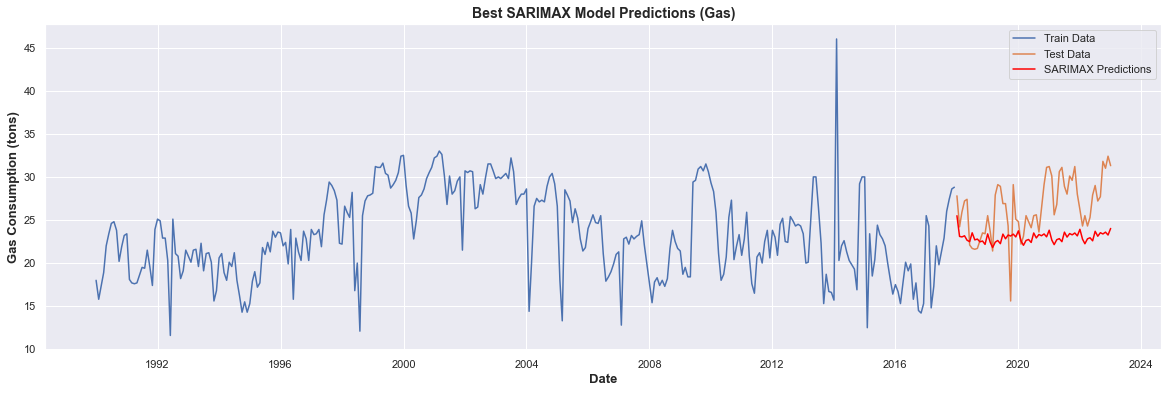

In [102]:
# import SARIMAX model and performance metrics
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# define ranges for hyperparameters: SARIMAX(p, d, q)(P, D, Q, s)
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
s_values = [12]  # seasonal period

# initialize variables for best model parameters and performance metrics
best_rmse = float("inf")
best_mape = float("inf")
best_aic = float("inf")
best_bic = float("inf")
best_params = None

# loop through all combinations of hyperparameters
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        for s in s_values:
                            order = (p, d, q)
                            seasonal_order = (P, D, Q, s)
                            try:
                                # fit SARIMAX model
                                sarimax_model = SARIMAX(train_gas, order=order, seasonal_order=seasonal_order)
                                sarimax_model_fit = sarimax_model.fit()

                                # generate predictions
                                pred_gas = sarimax_model_fit.predict(start=test_gas.index[0], end=test_gas.index[-1])

                                # calculate RMSE
                                mse = mean_squared_error(test_gas, pred_gas)
                                rmse = np.sqrt(mse)

                                # calculate MAPE
                                mape = np.mean(np.abs((test_gas - pred_gas) / test_gas)) * 100

                                # calculate AIC and BIC
                                aic = sarimax_model_fit.aic
                                bic = sarimax_model_fit.bic

                                # update best parameters and metrics if they are better
                                if rmse + mape + aic + bic < best_rmse + best_mape + best_aic + best_bic:
                                    best_rmse = rmse
                                    best_mape = mape
                                    best_aic = aic
                                    best_bic = bic
                                    best_params = (order, seasonal_order)
                            except:
                                continue

# print best hyperparameters
print("Best SARIMAX Hyperparameters:", best_params)

# print best RMSE, MAPE, AIC, and BIC
print(f'Best RMSE: {best_rmse:.2f}')
print(f'Best MAPE: {best_mape:.2f}%')
print(f'Best AIC: {best_aic:.2f}')
print(f'Best BIC: {best_bic:.2f}')

# plot the best SARIMAX model's predictions
plt.figure(figsize=(20,6))
plt.plot(train_gas.index, train_gas, label='Train Data')
plt.plot(test_gas.index, test_gas, label='Test Data')
plt.plot(test_gas.index, pred_gas, label='SARIMAX Predictions', color='red')
plt.title('Best SARIMAX Model Predictions (Gas)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Gas Consumption (tons)', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

<h4>Electricity Consumption SARIMAX Model</h4>

Best SARIMAX Hyperparameters: ((0, 0, 2), (0, 1, 1, 12))
Best RMSE: 35.23
Best MAPE: 134.28%
Best AIC: 2939.20
Best BIC: 2954.31


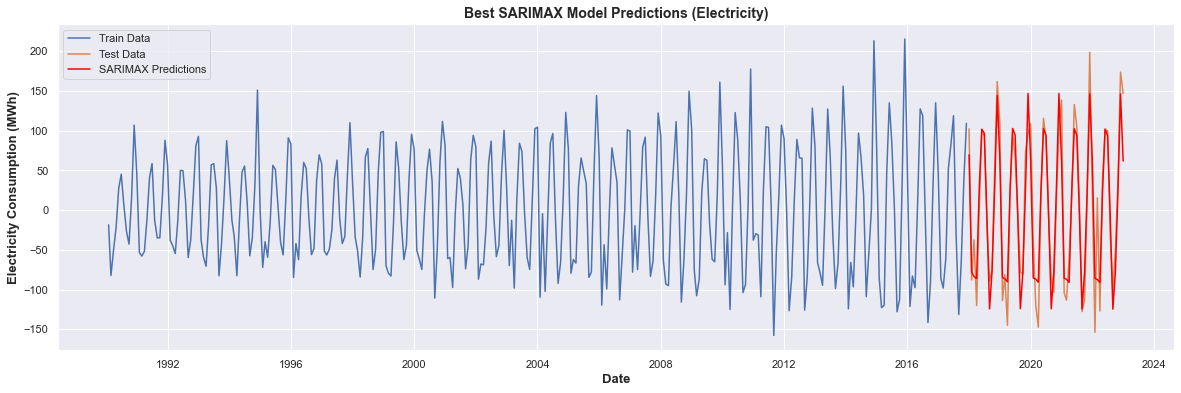

In [84]:
# import SARIMAX model and performance metrics
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# define ranges for hyperparameters: SARIMAX(p, d, q)(P, D, Q, s)
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
s_values = [12]  # seasonal period

# initialize variables for best model parameters and performance metrics
best_rmse = float("inf")
best_mape = float("inf")
best_aic = float("inf")
best_bic = float("inf")
best_params = None

# loop through all combinations of hyperparameters
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        for s in s_values:
                            order = (p, d, q)
                            seasonal_order = (P, D, Q, s)
                            try:
                                # fit SARIMAX model
                                sarimax_model = SARIMAX(train_electricity, order=order, seasonal_order=seasonal_order)
                                sarimax_model_fit = sarimax_model.fit()

                                # generate predictions
                                pred_electricity = sarimax_model_fit.predict(start=test_electricity.index[0], end=test_electricity.index[-1])

                                # calculate RMSE
                                mse = mean_squared_error(test_electricity, pred_electricity)
                                rmse = np.sqrt(mse)

                                # calculate MAPE
                                mape = np.mean(np.abs((test_electricity - pred_electricity) / test_electricity)) * 100

                                # calculate AIC and BIC
                                aic = sarimax_model_fit.aic
                                bic = sarimax_model_fit.bic

                                # update best parameters and metrics if they are better
                                if rmse + mape + aic + bic < best_rmse + best_mape + best_aic + best_bic:
                                    best_rmse = rmse
                                    best_mape = mape
                                    best_aic = aic
                                    best_bic = bic
                                    best_params = (order, seasonal_order)
                            except:
                                continue

# print best hyperparameters
print("Best SARIMAX Hyperparameters:", best_params)

# print best RMSE, MAPE, AIC, and BIC
print(f'Best RMSE: {best_rmse:.2f}')
print(f'Best MAPE: {best_mape:.2f}%')
print(f'Best AIC: {best_aic:.2f}')
print(f'Best BIC: {best_bic:.2f}')

# plot the best SARIMAX model's predictions
plt.figure(figsize=(20,6))
plt.plot(train_electricity.index, train_electricity, label='Train Data')
plt.plot(test_electricity.index, test_electricity, label='Test Data')
plt.plot(test_electricity.index, pred_electricity, label='SARIMAX Predictions', color='red')
plt.title('Best SARIMAX Model Predictions (Electricity)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Electricity Consumption (MWh)', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

<h4>Water Consumption SARIMAX Model</h4>

Best SARIMAX Hyperparameters: ((1, 1, 1), (0, 1, 1, 12))
Best RMSE: 110.91
Best MAPE: 17.58%
Best AIC: 3954.61
Best BIC: 3969.72


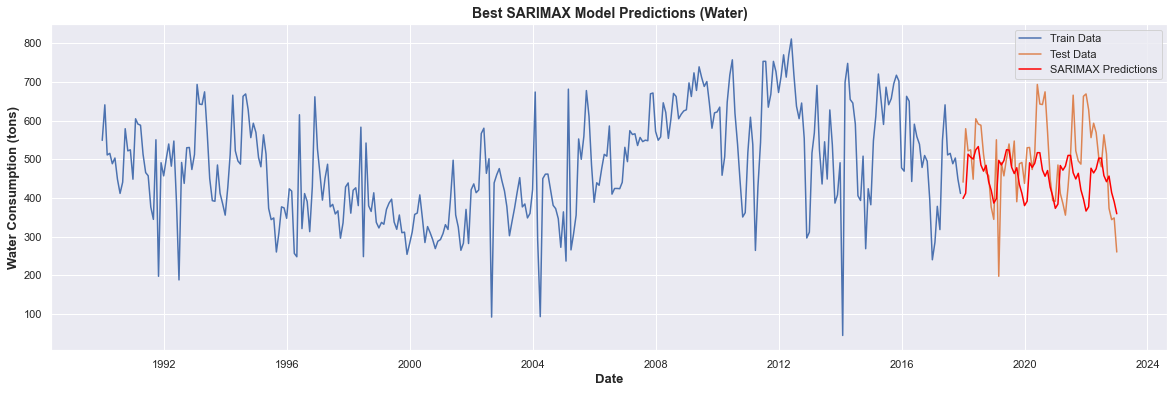

In [103]:
# import SARIMAX model and performance metrics
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# define ranges for hyperparameters: SARIMAX(p, d, q)(P, D, Q, s)
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
s_values = [12]  # seasonal period

# initialize variables for best model parameters and performance metrics
best_rmse = float("inf")
best_mape = float("inf")
best_aic = float("inf")
best_bic = float("inf")
best_params = None

# loop through all combinations of hyperparameters
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        for s in s_values:
                            order = (p, d, q)
                            seasonal_order = (P, D, Q, s)
                            try:
                                # fit SARIMAX model
                                sarimax_model = SARIMAX(train_water, order=order, seasonal_order=seasonal_order)
                                sarimax_model_fit = sarimax_model.fit()

                                # generate predictions
                                pred_gas = sarimax_model_fit.predict(start=test_water.index[0], end=test_water.index[-1])

                                # calculate RMSE
                                mse = mean_squared_error(test_water, pred_water)
                                rmse = np.sqrt(mse)

                                # calculate MAPE
                                mape = np.mean(np.abs((test_water - pred_water) / test_water)) * 100

                                # calculate AIC and BIC
                                aic = sarimax_model_fit.aic
                                bic = sarimax_model_fit.bic

                                # update best parameters and metrics if they are better
                                if rmse + mape + aic + bic < best_rmse + best_mape + best_aic + best_bic:
                                    best_rmse = rmse
                                    best_mape = mape
                                    best_aic = aic
                                    best_bic = bic
                                    best_params = (order, seasonal_order)
                            except:
                                continue

# print best hyperparameters
print("Best SARIMAX Hyperparameters:", best_params)

# print best RMSE, MAPE, AIC, and BIC
print(f'Best RMSE: {best_rmse:.2f}')
print(f'Best MAPE: {best_mape:.2f}%')
print(f'Best AIC: {best_aic:.2f}')
print(f'Best BIC: {best_bic:.2f}')

# plot the best SARIMAX model's predictions
plt.figure(figsize=(20,6))
plt.plot(train_water.index, train_water, label='Train Data')
plt.plot(test_water.index, test_water, label='Test Data')
plt.plot(test_water.index, pred_water, label='SARIMAX Predictions', color='red')
plt.title('Best SARIMAX Model Predictions (Water)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Water Consumption (tons)', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

- As you can see, the forecast seems to be more realistic and accurate as compared to the ARIMAX model. 

<h1><center>Forecast Future Values: Predict next 3 years</center></h1>

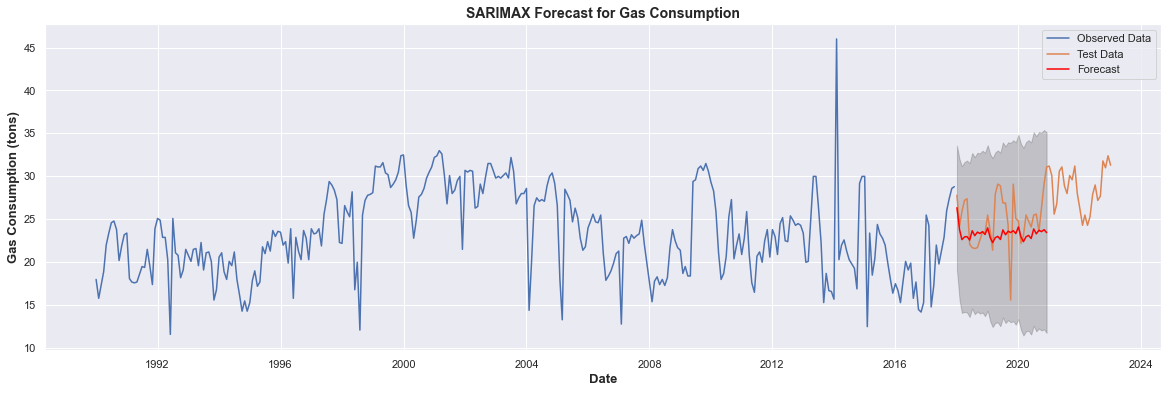

In [106]:
# fit ARIMA model with best parameters
best_gas_model = SARIMAX(train_gas, order=[1,1,1], seasonal_order=[0,1,1,12])
best_gas_model_fit = best_gas_model.fit()

# forecast the next 3 years (data frequency is monthly)
forecast_steps = 36  # 3 years * 12 months/year
forecasted_values = best_gas_model_fit.get_forecast(steps=forecast_steps)

# plot the forecast, and confidence interval
plt.figure(figsize=(20,6))
plt.plot(train_gas.index, train_gas, label='Observed Data')
plt.plot(test_gas.index, test_gas, label='Test Data')
plt.plot(forecasted_values.predicted_mean.index, forecasted_values.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecasted_values.conf_int().index,
                forecasted_values.conf_int().iloc[:, 0],
                forecasted_values.conf_int().iloc[:, 1], color='k', alpha=0.2)
plt.title('SARIMAX Forecast for Gas Consumption', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Gas Consumption (tons)', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

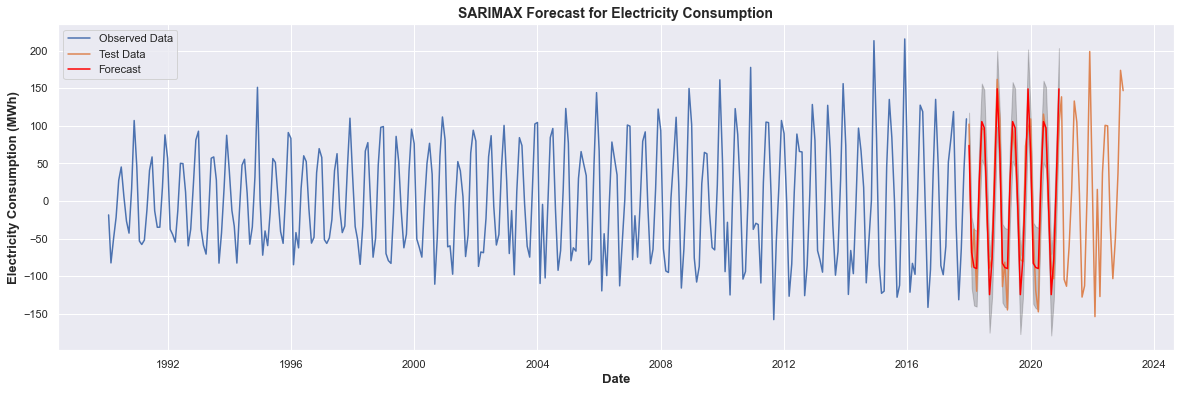

In [107]:
# fit ARIMA model with best parameters
best_electricity_model = SARIMAX(train_electricity, order=[0,0,2], seasonal_order=[0,1,1,12])
best_electricity_model_fit = best_electricity_model.fit()

# forecast the next 3 years (data frequency is monthly)
forecast_steps = 36  # 3 years * 12 months/year
forecasted_values = best_electricity_model_fit.get_forecast(steps=forecast_steps)

# plot the forecast, and confidence interval
plt.figure(figsize=(20,6))
plt.plot(train_electricity.index, train_electricity, label='Observed Data')
plt.plot(test_electricity.index, test_electricity, label='Test Data')
plt.plot(forecasted_values.predicted_mean.index, forecasted_values.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecasted_values.conf_int().index,
                forecasted_values.conf_int().iloc[:, 0],
                forecasted_values.conf_int().iloc[:, 1], color='k', alpha=0.2)
plt.title('SARIMAX Forecast for Electricity Consumption', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Electricity Consumption (MWh)', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

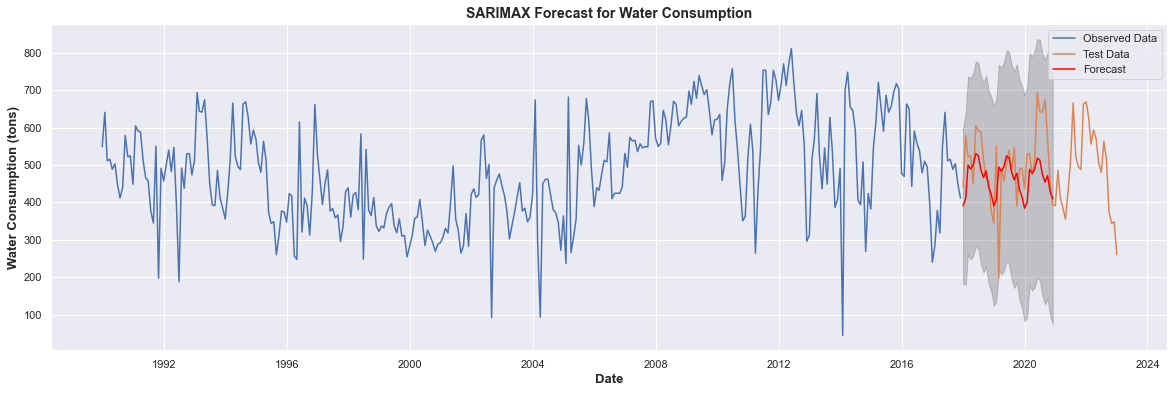

In [105]:
# fit ARIMA model with best parameters
best_water_model = SARIMAX(train_water, order=[1,1,1], seasonal_order=[0,1,1,12])
best_water_model_fit = best_water_model.fit()

# forecast the next 3 years (data frequency is monthly)
forecast_steps = 36  # 3 years * 12 months/year
forecasted_values = best_water_model_fit.get_forecast(steps=forecast_steps)

# plot the forecast, and confidence interval
plt.figure(figsize=(20,6))
plt.plot(train_water.index, train_water, label='Observed Data')
plt.plot(test_water.index, test_water, label='Test Data')
plt.plot(forecasted_values.predicted_mean.index, forecasted_values.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecasted_values.conf_int().index,
                forecasted_values.conf_int().iloc[:, 0],
                forecasted_values.conf_int().iloc[:, 1], color='k', alpha=0.2)
plt.title('SARIMAX Forecast for Water Consumption', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Water Consumption (tons)', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

<h1><center>Conclusion/Final Insights Gained</center></h1>

- I used Simple Exponential Smoothing (ES) and Seasonal Exponential Smoothing models to capture underlying trends and seasonality in the dataset. These models provided valuable baseline forecasts, showcasing the patterns in the energy consumption over time. 
- Additionally, I used ARIMA and SARIMAX (includes seasonality), which consider both the historical values and their relationships to forecast future consumption.

- The ARIMA model enabled me to capture the non-seasonal patterns present in the data, while the SARIMA model further incorporated the seasonality component, leading to more accurate predictions. The SARIMAX model extended this approach by considering external exogenous variables, which could provide further context to enhance prediction accuracy, with the use of performance metrics. 

- In conclusion, I learnt that different models have different limitations and strengths.
- In this analysis, seasonal ES and seasonal ARIMA provided better results.
- Seasonal ARIMA seems to be the best at forecasting future values, predicting fluctuations in water and electricity consumption values, while an increase in gas consumption values over time. 

<h1><center>--- End of Part A, thank you! ---</center></h1>